<h1>Задача предсказания отклика клиентов ОТП Банка (конкурс)</h1>

**Задача предсказания отклика клиентов ОТП Банка** — конкурс по решению прикладной задачи из области банковского маркетинга, проводимый в рамках всероссийской конференции «Математические методы распознавания образов» ММРО-15, г.Петрозаводск, Республика Карелия, 11–17 сентября 2011.

Данные предоставлены ОТП Банком (www.otpbank.ru), который входит в число 50 крупнейших банков России, занимает 2-е место на рынке потребительского 
кредитования, 3-е место на рынке беззалогового кредитования, и 4-е место на рынке кредитных карт.

<h2>Описание задачи</h2>

Один из способов повышения эффективности взаимодействия банка с клиентами заключается в том, чтобы отправлять предложение о новой услуге не всем клиентам банка, а только некоторой части, выбираемой по принципу наибольшей склонности к отклику на данное предложение.

Конкурсное задание заключается в том, чтобы предложить алгоритм, который будет выдавать оценку склонности клиента к положительному отклику по его признаковому описанию. Эта оценка может (хотя и не обязана) интерпретироваться как вероятность положительного отклика. Предполагается, что, получив такие оценки для некоторого множества клиентов, банк обратится с предложением только к тем клиентам, у которых значение оценки выше некоторого порога.

Описание данных

Исходная выборка («выборка А») содержит записи о 15 223 клиентов, классифицированных на два класса:

1 — отклик был (1812 клиентов),
0 — отклика не было (13411 клиентов).
Ещё 14 910 записей отложены в качестве тестовых («выборка Б») – ответы по ним известны только банку. Тестовые данные будут использоваться для определения победителя конкурса.

Записи (признаковые описания) клиентов состоят из 50 признаков, в состав которых входит, в частности, возраст, пол, социальный статус относительно работы, социальный статус относительно пенсии, количество детей, количество иждивенцев, образование, семейное положение, отрасль работы.

Данные доступны по следующим адресам:

[Train](http://www.machinelearning.ru/wiki/images/2/26/Contest_MMRO15_OTP.rar) и [Test (без Targetа)](http://www.machinelearning.ru/wiki/images/5/52/Contest_MMRO15_OTP_(validation).rar)
***                                                                                                                                   

<h2>Этап 1. Построение модели на обучающей выборке – части исторической выборки и её проверка на контрольной выборке – части исторической выборки</h2>

<h3>1.1 Считывание CSV-файла, содержащего исторические данные в объекте DataFrame</h3>

In [190]:
# Отключение предупреждений Anaconda
import warnings
warnings.simplefilter('ignore')

# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='Verdana')

In [191]:
# Увеличение количества отоброжаемых столбцов
pd.set_option('display.max_columns', 60)
# Загрузка набора данных
data = pd.read_excel(r'D:\Python_projects\Jupiter_Notebook\Data\data_set.xls', sheet_name='данные')
# Выедем первые 5 наблюдений
data.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,PERSONAL_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,OWN_AUTO,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,CREDIT,TERM,FST_PAYMENT,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_LIVING_TERM,WORK_TIME,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,Торговля,Рабочий,Частная компания,Без участия,Вспомогательный техперсонал,от 10000 до 20000 руб.,5000.000,Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛЖСКИЙ,1,1,1,1,1,0,0,0,0,0,0,0,8000.000,6,8650.000,0,1,220,18.000,0,0,1,1,1,6,2,1,1580.000,1580.000,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000.000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,0,0,0,0,21650.000,6,4000.000,0,1,137,97.000,1,0,1,1,1,6,1,1,4020.000,4020.000,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,Информационные технологии,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,9000.000,Иркутская область,Иркутская область,Иркутская область,Иркутская область,ВОСТОЧНО-СИБИРСКИЙ,1,1,1,1,1,0,0,0,1,0,0,0,33126.000,12,4000.000,0,1,251,84.000,0,0,1,2,1,11,0,0,0.000,0.000,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,Образование,Руководитель среднего звена,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 20000 до 50000 руб.,25000.000,Ростовская область,Ростовская область,Ростовская область,Ростовская область,ЮЖНЫЙ,0,1,0,0,1,1,0,0,0,0,0,0,8491.820,6,5000.000,0,0,36,168.000,1,1,1,1,1,6,3,1,1589.923,1590.000,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,Государственная служба,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,12000.000,Кабардино-Балкария,Кабардино-Балкария,Кабардино-Балкария,Ставропольский край,ЮЖНЫЙ,1,1,1,1,0,0,0,0,1,0,0,0,21990.000,12,4000.000,0,1,83,101.000,1,0,1,2,1,16,2,1,1152.150,2230.000,NaN


<h3>1.2 Преобразование типов переменных</h3>

In [192]:
# Выводим информацию о количестве непропущенных наблюдений в переменных и типах переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AGREEMENT_RK                15223 non-null  int64  
 1   TARGET                      15223 non-null  int64  
 2   AGE                         15223 non-null  int64  
 3   SOCSTATUS_WORK_FL           15223 non-null  int64  
 4   SOCSTATUS_PENS_FL           15223 non-null  int64  
 5   GENDER                      15223 non-null  int64  
 6   CHILD_TOTAL                 15223 non-null  int64  
 7   DEPENDANTS                  15223 non-null  int64  
 8   EDUCATION                   15223 non-null  object 
 9   MARITAL_STATUS              15223 non-null  object 
 10  GEN_INDUSTRY                13856 non-null  object 
 11  GEN_TITLE                   13856 non-null  object 
 12  ORG_TP_STATE                13856 non-null  object 
 13  ORG_TP_FCAPITAL             138

In [193]:
# Находим все колонки с категориальными переменными флагами (содержащие '_FL')
fl_columns = [col for col in data.columns if '_FL' in col]
# переменные, неверно записанные как количественные, преобразуем в тип object
for i in ['AGREEMENT_RK', 'TARGET', 'GENDER', *fl_columns]:
    data[i] = data[i].astype('object')
# смотрим исправленные типы переменных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AGREEMENT_RK                15223 non-null  object 
 1   TARGET                      15223 non-null  object 
 2   AGE                         15223 non-null  int64  
 3   SOCSTATUS_WORK_FL           15223 non-null  object 
 4   SOCSTATUS_PENS_FL           15223 non-null  object 
 5   GENDER                      15223 non-null  object 
 6   CHILD_TOTAL                 15223 non-null  int64  
 7   DEPENDANTS                  15223 non-null  int64  
 8   EDUCATION                   15223 non-null  object 
 9   MARITAL_STATUS              15223 non-null  object 
 10  GEN_INDUSTRY                13856 non-null  object 
 11  GEN_TITLE                   13856 non-null  object 
 12  ORG_TP_STATE                13856 non-null  object 
 13  ORG_TP_FCAPITAL             138

<h3>1.3 Импутация пропусков, не использующая результаты математических вычислений (импутация, которую можно выполнять до/после разбиения на обучение/контроль)</h3>

*Пропуски переменных GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR и WORK_TIME, скорей всего обусловлены неприменимостью вопроса о занятости для клиентов, являющимхся пенсионерами.*
1. Пропуски в переменных **GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL** заменяем меткой "Не указано", если в соответствующей переменной есть пропуск и при этом переменная SOCSTATUS_PENS_FL == 1. (т.е клиент является пенсионером).
2. Пропуски в переменных **JOB_DIR и REGION_NM** заменяем меткой "Не указано".
3. Пропуски в переменной **TP_PROVINCE** заменяем значением переменной FACT_ADDRESS_PROVINCE (спорно, но практика говорит, что имеет место быть)
4. Пропуски в переменной **PREVIOUS_CARD_NUM_UTILIZED** заменяем 0 (так указано в описании задания)

In [194]:
# 1
for col in ['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL']:
    data[col] = np.where(
        (data[col].isnull()) & (data['SOCSTATUS_PENS_FL'] == 1),
        'Не указано',
        data[col]
    )

# 2
data[['JOB_DIR', 'REGION_NM']] = data[['JOB_DIR', 'REGION_NM']].fillna('Не указано')

#3
data['TP_PROVINCE'] = np.where(
    data['TP_PROVINCE'].isnull(),
    data['FACT_ADDRESS_PROVINCE'],
    data['TP_PROVINCE']
)

#4
data['PREVIOUS_CARD_NUM_UTILIZED'] = data['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)

In [195]:
# смотрим количество пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AGREEMENT_RK                15223 non-null  object 
 1   TARGET                      15223 non-null  object 
 2   AGE                         15223 non-null  int64  
 3   SOCSTATUS_WORK_FL           15223 non-null  object 
 4   SOCSTATUS_PENS_FL           15223 non-null  object 
 5   GENDER                      15223 non-null  object 
 6   CHILD_TOTAL                 15223 non-null  int64  
 7   DEPENDANTS                  15223 non-null  int64  
 8   EDUCATION                   15223 non-null  object 
 9   MARITAL_STATUS              15223 non-null  object 
 10  GEN_INDUSTRY                15222 non-null  object 
 11  GEN_TITLE                   15222 non-null  object 
 12  ORG_TP_STATE                15222 non-null  object 
 13  ORG_TP_FCAPITAL             152

<h3>1.4 Обработка редких категорий</h3>

In [196]:
# выделяем категориальные переменные в группу
categorical_columns = [col for col in data.columns if data[col].dtype.name == 'object']

# выведем статистики по категориальным переменным, смотрим unique
# смотрим переменные, у которых unique ≈ наблюдения или unique = 1
data[categorical_columns].describe()

,AGREEMENT_RK,TARGET,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,FAMILY_INCOME,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,REG_FACT_FL,FACT_POST_FL,REG_POST_FL,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,FL_PRESENCE_FL,AUTO_RUS_FL,HS_PRESENCE_FL,COT_PRESENCE_FL,GAR_PRESENCE_FL,LAND_PRESENCE_FL,DL_DOCUMENT_FL,GPF_DOCUMENT_FL,FACT_PHONE_FL,REG_PHONE_FL,GEN_PHONE_FL
count,15223,15223,15223,15223,15223,15223,15223,15222,15222,15222,15222,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223,15223
unique,15223,2,2,2,2,7,5,32,13,6,3,11,5,81,81,80,72,12,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2
top,75292242,0,1,0,1,Среднее специальное,Состою в браке,Торговля,Специалист,Частная компания,Без участия,Участие в основ. деятельности,от 10000 до 20000 руб.,Краснодарский край,Краснодарский край,Краснодарский край,Краснодарский край,ЮЖНЫЙ,1,1,1,1,1,0,0,0,0,0,0,0,1,1,0,1
freq,1,13411,13847,13176,9964,6518,9416,2385,7010,6523,13688,11452,7077,674,674,674,790,2179,12765,14480,13493,12758,13782,10507,14097,11940,15074,14930,14558,15223,8961,9311,14389,13855


Удалим следующеие переменные:
1. **AGREEMENT_RK**: unique ≈ наблюдения (при этом не прослеживается способа извлечения из неё полезной информации)
2. **DL_DOCUMENT_FL**: unique = 1 (никто не указал информацию по водительскому удостоверению)

In [197]:
#1
data.drop('AGREEMENT_RK', axis=1, inplace=True)

#2
data.drop('DL_DOCUMENT_FL', axis=1, inplace=True)

In [198]:
# заново выделяем категориальные переменные в группу
categorical_columns = [col for col in data.columns if data[col].dtype.name == 'object']
for col in categorical_columns:
    print(data[col].value_counts(dropna=False))
# Показывает категории, размер которых меньше 2% от всей выборки 
#   print(data[col].value_counts(dropna=False)[data[col].value_counts(dropna=False) < len(data) * 0.02])

TARGET
0    13411
1     1812
Name: count, dtype: int64
SOCSTATUS_WORK_FL
1    13847
0     1376
Name: count, dtype: int64
SOCSTATUS_PENS_FL
0    13176
1     2047
Name: count, dtype: int64
GENDER
1    9964
0    5259
Name: count, dtype: int64
EDUCATION
Среднее специальное               6518
Среднее                           4679
Высшее                            3133
Неоконченное высшее                532
Неполное среднее                   340
Два и более высших образования      20
Ученая степень                       1
Name: count, dtype: int64
MARITAL_STATUS
Состою в браке        9416
Не состоял в браке    3622
Разведен(а)           1245
Вдовец/Вдова           588
Гражданский брак       352
Name: count, dtype: int64
GEN_INDUSTRY
Торговля                                     2385
Другие сферы                                 1709
Не указано                                   1366
Металлургия/Промышленность/Машиностроение    1356
Государственная служба                       1286
Здравоохране

3. **REGION_NM** категорию ПОВОЛЖСКИЙ, отнесём к категории ПРИВОЛЖСКИЙ (Поволжский — это разговорное/историческое название, которое иногда попадает в базы (особенно если данные интегрировались из разных источников)
4. **REG_ADDRESS_PROVINCE, POSTAL_ADDRESS_PROVINCE, FACT_ADDRESS_PROVINCE, TP_PROVINCE** – приведём данные к полным официальным названиям
5. **REG_ADDRESS_PROVINCE, POSTAL_ADDRESS_PROVINCE, FACT_ADDRESS_PROVINCE** редкие категории: с < 60 (~0.4 % от 15223) объеденим в категорию 'ДРУГОЕ'
6. **TP_PROVINCE** редкие категории: с < 70 (~0.4 % от 15223) объеденим в категорию 'ДРУГОЕ'

In [199]:
#3
data['REGION_NM'] = data['REGION_NM'].replace('ПОВОЛЖСКИЙ', 'ПРИВОЛЖСКИЙ')

#4
province_corrections = {
    # Республики - полные названия
    'Адыгея': 'Республика Адыгея',
    'Башкирия': 'Республика Башкортостан',
    'Бурятия': 'Республика Бурятия',
    'Дагестан': 'Республика Дагестан',
    'Коми': 'Республика Коми',
    'Калмыкия': 'Республика Калмыкия',
    'Карачаево-Черкесия': 'Карачаево-Черкесская республика',
    'Карелия': 'Республика Карелия',
    'Марийская республика': 'Республика Марий Эл',
    'Мордовская республика': 'Республика Мордовия',
    'Северная Осетия': 'Республика Северная Осетия-Алания',
    'Татарстан': 'Республика Татарстан',
    'Удмуртия': 'Удмуртская республика',
    'Чувашия': 'Чувашская республика',
    'Хакасия': 'Республика Хакасия',
    'Якутия': 'Республика Саха (Якутия)',
    
    # Исторические переименования
    'Читинская область': 'Забайкальский край',  # Переименована в 2008 году
    'Пермская область': 'Пермский край',   # Переименована в 2005 году
    'Камчатская область': 'Камчатский край', # Переименована в 2007 году
    
    # Горный Алтай - часть Алтайского края
    'Горный Алтай': 'Алтайский край'
}
for col in ['REG_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'TP_PROVINCE']:
    if col in data.columns:  # проверяем, что столбец существует
        data[col] = data[col].replace(province_corrections)

In [200]:
# Найдём редкие категории для '_ADDRESS_PROVINCE' и выведем в виде list
rare_provinces_list = []
for col in ['REG_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE']:
    vc = data[col].value_counts(dropna=False)
    rare_categories = vc[vc < 60].index.tolist()
    rare_provinces_list.extend(rare_categories)
    rare_provinces_list = list(set(rare_provinces_list))
print(rare_provinces_list)

# Выведем редкие категории для 'TP_PROVINCE' и выведем в виде list
print(data['TP_PROVINCE'].value_counts(dropna=False)[data['TP_PROVINCE'].value_counts(dropna=False) < 70].index.tolist())

['Ямало-Ненецкий АО', 'Магаданская область', 'Агинский Бурятский АО', 'Республика Калмыкия', 'Республика Хакасия', 'Москва', 'Республика Дагестан', 'Усть-Ордынский Бурятский АО', 'Эвенкийский АО']
['Еврейская АО', 'Сахалинская область', 'Магаданская область', 'Кабардино-Балкария', 'Республика Дагестан']


In [201]:
#5
for col in ['REG_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE']:
    data[col] = np.where((data[col] == 'Республика Хакасия')
                        | (data[col] == 'Ямало-Ненецкий АО')
                        | (data[col] == 'Эвенкийский АО')
                        | (data[col] == 'Республика Калмыкия')
                        | (data[col] == 'Агинский Бурятский АО')
                        | (data[col] == 'Усть-Ордынский Бурятский АО')
                        | (data[col] == 'Москва')
                        | (data[col] == 'Магаданская область')
                        | (data[col] == 'Республика Дагестан'),
                         'ДРУГОЕ', data[col])
#6
data['TP_PROVINCE'] = np.where((data['TP_PROVINCE'] == 'Еврейская АО')
                               | (data['TP_PROVINCE'] == 'Сахалинская область')
                               | (data['TP_PROVINCE'] == 'Магаданская область')
                               | (data['TP_PROVINCE'] == 'Кабардино-Балкария')
                               | (data['TP_PROVINCE'] == 'Республика Дагестан'),
                               'ДРУГОЕ', data['TP_PROVINCE'])

7. Выполним укрупнение категорий для **EDUCATION, GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE и JOB_DIR**

In [202]:
data['EDUCATION'].value_counts(dropna=False)

EDUCATION
Среднее специальное               6518
Среднее                           4679
Высшее                            3133
Неоконченное высшее                532
Неполное среднее                   340
Два и более высших образования      20
Ученая степень                       1
Name: count, dtype: int64

In [203]:
#7.1 (укрупняем категории переменной 'EDUCATION')
data['EDUCATION'] = data['EDUCATION'].replace('Ученая степень', 'Высшее')
data['EDUCATION'] = data['EDUCATION'].replace('Два и более высших образования', 'Высшее')

In [204]:
data['GEN_INDUSTRY'].value_counts(dropna=False)

GEN_INDUSTRY
Торговля                                     2385
Другие сферы                                 1709
Не указано                                   1366
Металлургия/Промышленность/Машиностроение    1356
Государственная служба                       1286
Здравоохранение                              1177
Образование                                   998
Транспорт                                     787
Сельское хозяйство                            702
Строительство                                 574
Коммунальное хоз-во/Дорожные службы           533
Ресторанный бизнес/Общественное питание       408
Наука                                         403
Нефтегазовая промышленность                   225
Сборочные производства                        172
Банк/Финансы                                  169
Энергетика                                    145
Развлечения/Искусство                         141
ЧОП/Детективная д-ть                          136
Информационные услуги                

In [205]:
#7.2 (укрупняем категории переменной 'GEN_INDUSTRY')
gen_industry_mapping = {
    'Юридические услуги/нотариальные услуги': 'Другие сферы',
    'Страхование': 'Другие сферы',
    'Туризм': 'Другие сферы',
    'Недвижимость': 'Другие сферы',
    'Управляющая компания': 'Другие сферы',
    'Логистика': 'Другие сферы',
    'Подбор персонала': 'Другие сферы',
    'Маркетинг': 'Другие сферы'
}
data['GEN_INDUSTRY'] = data['GEN_INDUSTRY'].map(gen_industry_mapping).fillna(data['GEN_INDUSTRY'])

In [206]:
data['GEN_TITLE'].value_counts(dropna=False)

GEN_TITLE
Специалист                        7010
Рабочий                           3075
Не указано                        1366
Служащий                           904
Руководитель среднего звена        697
Работник сферы услуг               563
Высококвалифиц. специалист         549
Руководитель высшего звена         427
Индивидуальный предприниматель     217
Другое                             177
Руководитель низшего звена         136
Военнослужащий по контракту         88
Партнер                             13
NaN                                  1
Name: count, dtype: int64

In [207]:
#7.3 (укрупняем категории переменной 'GEN_TITLE')
data['GEN_TITLE'] = data['GEN_TITLE'].replace('Военнослужащий по контракту', 'Другое')
data['GEN_TITLE'] = data['GEN_TITLE'].replace('Партнер', 'Другое')

In [208]:
data['ORG_TP_STATE'].value_counts(dropna=False)

ORG_TP_STATE
Частная компания                  6523
Государственная комп./учреж.      6112
Не указано                        1366
Индивидуальный предприниматель     957
Некоммерческая организация         243
Частная ком. с инос. капиталом      21
NaN                                  1
Name: count, dtype: int64

In [209]:
#7.4 (укрупняем категории переменной 'ORG_TP_STATE')
data['ORG_TP_STATE'] = data['ORG_TP_STATE'].replace('Частная ком. с инос. капиталом', 'Частная компания')

In [210]:
data['JOB_DIR'].value_counts(dropna=False)

JOB_DIR
Участие в основ. деятельности    11452
Не указано                        1367
Вспомогательный техперсонал       1025
Бухгалтерия, финансы, планир.      481
Адм-хоз. и трансп. службы          279
Снабжение и сбыт                   217
Служба безопасности                164
Кадровая служба и секретариат      101
Пр-техн. обесп. и телеком.          75
Юридическая служба                  53
Реклама и маркетинг                  9
Name: count, dtype: int64

In [211]:
#7.5 (укрупняем категории переменной 'JOB_DIR')
job_dir_mapping = {
    'Кадровая служба и секретариат': 'Другое',
    'Пр-техн. обесп. и телеком.': 'Другое',
    'Юридическая служба': 'Другое',
    'Реклама и маркетинг': 'Другое',
}
data['JOB_DIR'] = data['JOB_DIR'].replace(job_dir_mapping)

<h3>1.5 Конструирование новых признаков, не использующее результаты математических вычислений (которое можно выполнять до/после разбиения на обучение/контроль)</h3>

1. Создадим **FACT_TP_FL**: 1 - область фактического пребывания клиента совпадает с областью торговой точки, где клиент брал последний кредит;
                        0 - в противном случае.
2. Создадим **AUTO_FOR_FL**: 1 - у клиента есть автомобиль импортного производства
                         0 - в противном случае
3. Создадим парное взаимодействие переменных **GENDER** и **GAR_PRESENCE_FL**
4. Создадим парное взаимодействие переменных **REG_FACT_FL** и **GAR_PRESENCE_FL**

In [212]:
#1
data['FACT_TP_FL'] = np.where(data['FACT_ADDRESS_PROVINCE'] == data['TP_PROVINCE'], 1, 0).astype('object')

In [213]:
#2
data['AUTO_FOR_FL'] = np.where((data['AUTO_RUS_FL'] == 0) & (data['OWN_AUTO'] > 0), 1, 0).astype('object')

In [214]:
# Создадим функцию, которая формирует переменную в результате конъюнкции переменных f1 и f2
def make_conj(df: pd.DataFrame, f1: str, f2: str):
    df[f1 + "+" + f2] = df[f1].astype('str') + "+" + df[f2].astype('str')
#3
make_conj(data, 'GENDER', 'GAR_PRESENCE_FL')
#4
make_conj(data, 'REG_FACT_FL', 'GAR_PRESENCE_FL')

In [215]:
# отключаем на всякий случай экспоненциальное представление
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data.describe()

,AGE,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,OWN_AUTO,CREDIT,TERM,FST_PAYMENT,FACT_LIVING_TERM,WORK_TIME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
count,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000,13855.000,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000,15223.000
mean,40.406,1.099,0.645,13853.836,0.116,14667.959,8.101,3398.563,3039.340,292.212,1.388,0.752,7.876,0.195,0.130,239.457,243.022,0.019
std,11.601,0.995,0.812,9015.468,0.321,12147.873,4.094,5158.109,262455.437,24364.832,0.794,0.988,7.956,0.685,0.356,827.700,836.100,0.138
min,21.000,0.000,0.000,24.000,0.000,2000.000,3.000,0.000,-26.000,1.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
25%,30.000,0.000,0.000,8000.000,0.000,6500.000,6.000,1000.000,41.000,24.000,1.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000
50%,39.000,1.000,0.000,12000.000,0.000,11550.000,6.000,2000.000,108.000,48.000,1.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000
75%,50.000,2.000,1.000,17000.000,0.000,19170.000,10.000,4000.000,204.000,110.000,2.000,1.000,8.000,0.000,0.000,0.000,0.000,0.000
max,67.000,10.000,7.000,250000.000,2.000,119700.000,36.000,140000.000,28101997.000,2867959.000,11.000,11.000,114.000,13.000,8.000,28012.200,28012.200,2.000


5. Значения **FACT_LIVING_TERM** берём по модулю, чтобы избавиться от отрицательных значений.

In [216]:
#5
data['FACT_LIVING_TERM'] = data['FACT_LIVING_TERM'].abs() 

<h3>1.6 Разбиение на обучающую и контрольную выборки</h3>

In [217]:
train = data.sample(frac=0.7, random_state=200)
test = data.drop(train.index)

<h3>1.7 Импутация пропусков, использующая статистики – результаты математических вычислений (её нужно выполнять после разбиения на обучение и контроль)</h3>

In [218]:
# посмотрим в каких переменных остались пропуски
print('Пропуски в Train-переменных:')
for col in train.columns:
    if train[col].isnull().sum() > 0:
        print(col, train[col].isnull().sum())
print('Пропуски в Test-переменных:')
for col in test.columns:
    if test[col].isnull().sum() > 0:
        print(col, test[col].isnull().sum())

Пропуски в Train-переменных:
WORK_TIME 1011
Пропуски в Test-переменных:
GEN_INDUSTRY 1
GEN_TITLE 1
ORG_TP_STATE 1
ORG_TP_FCAPITAL 1
WORK_TIME 357


1. **GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL** – пропуски импутируем модой, вычисленной на обучающей выборке.
2. **FACT_LIVING_TERM** – нет пропусков, но есть неверно указанные данные, когда стаж проживания по месту фактического пребывания превышает возраст клиента. Эти несостыковки в данных мы укажем как пропуски, а затем импутируем их медианным значением, вычисленной на обучающей выборке
3. **WORK_TIME** - большое кол-во пропусков, скорей всего, связано с тем, что они соответствуют клиентам-пенсионерам. Кроме того, присутствуют две ошибки ввода:
    - Наблюдения, в которых время работы > возраста (e.g.: человек работает 40 лет, а живёт 25)
    - Наблюдения, в которых разница между возрастом и временем работы в годах меньше 16 (e.g.: в 30 лет имеет стаж работы 20 лет, т.е. работает с 10 лет)

In [219]:
#1 (пропуски импутируем модой, вычисленной на обучающей выборке)
for col in ['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL']:
    train[col].fillna(train[col].mode().iloc[0], inplace=True)
    test[col].fillna(train[col].mode().iloc[0], inplace=True)

#2 (неверно указанные данные заменяем на пропуски и импутируем медианным значением)
train['FACT_LIVING_TERM'] = np.where(train['FACT_LIVING_TERM'] / 12 > train['AGE'], np.nan, train['FACT_LIVING_TERM'])
test['FACT_LIVING_TERM'] = np.where(test['FACT_LIVING_TERM'] / 12 > test['AGE'], np.nan, test['FACT_LIVING_TERM'])

train['FACT_LIVING_TERM'].fillna(train['FACT_LIVING_TERM'].median(), inplace=True)
test['FACT_LIVING_TERM'].fillna(train['FACT_LIVING_TERM'].median(), inplace=True)

#3 (неверно указанные данные заменяем на пропуски и импутируем медианным значением)
train['WORK_TIME'] = np.where(train['WORK_TIME'] / 12 > train['AGE'], np.nan, train['WORK_TIME'])
test['WORK_TIME'] = np.where(test['WORK_TIME'] / 12 > test['AGE'], np.nan, test['WORK_TIME'])
                             
train['WORK_TIME'] = np.where(train['AGE'] - train['WORK_TIME'] / 12 < 16, np.nan, train['WORK_TIME'])
test['WORK_TIME'] = np.where(test['AGE'] - test['WORK_TIME'] / 12 < 16, np.nan, test['WORK_TIME'])

train['WORK_TIME'].fillna(train['WORK_TIME'].median(), inplace=True)
test['WORK_TIME'].fillna(train['WORK_TIME'].median(), inplace=True)

In [220]:
# посмотрим в каких переменных остались пропуски
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


In [221]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10656 entries, 14692 to 6374
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET                       10656 non-null  object 
 1   AGE                          10656 non-null  int64  
 2   SOCSTATUS_WORK_FL            10656 non-null  object 
 3   SOCSTATUS_PENS_FL            10656 non-null  object 
 4   GENDER                       10656 non-null  object 
 5   CHILD_TOTAL                  10656 non-null  int64  
 6   DEPENDANTS                   10656 non-null  int64  
 7   EDUCATION                    10656 non-null  object 
 8   MARITAL_STATUS               10656 non-null  object 
 9   GEN_INDUSTRY                 10656 non-null  object 
 10  GEN_TITLE                    10656 non-null  object 
 11  ORG_TP_STATE                 10656 non-null  object 
 12  ORG_TP_FCAPITAL              10656 non-null  object 
 13  JOB_DIR           

<h3>1.8 Поиск преобразований переменных, максимизирующих нормальность распределения</h3>

In [222]:
# импортируем библиотеку seabron
import seaborn as sns

# импортируем norm и stats
from scipy.stats import norm
from scipy import stats

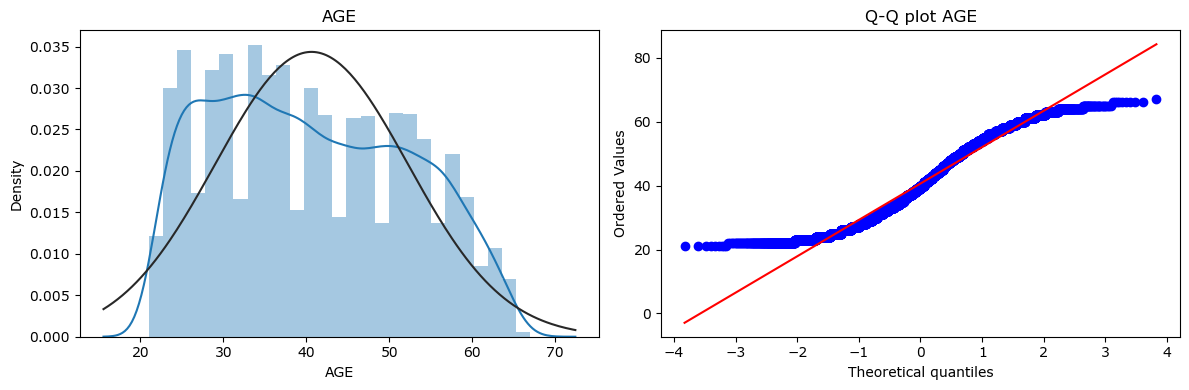

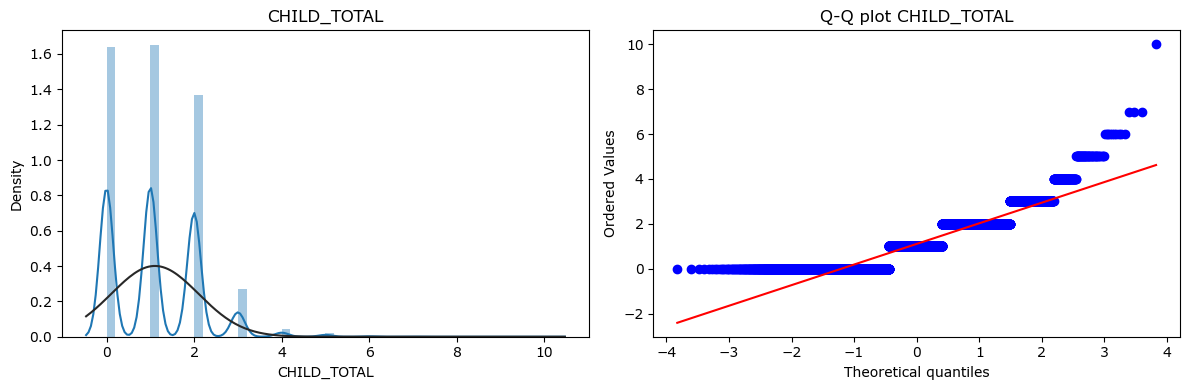

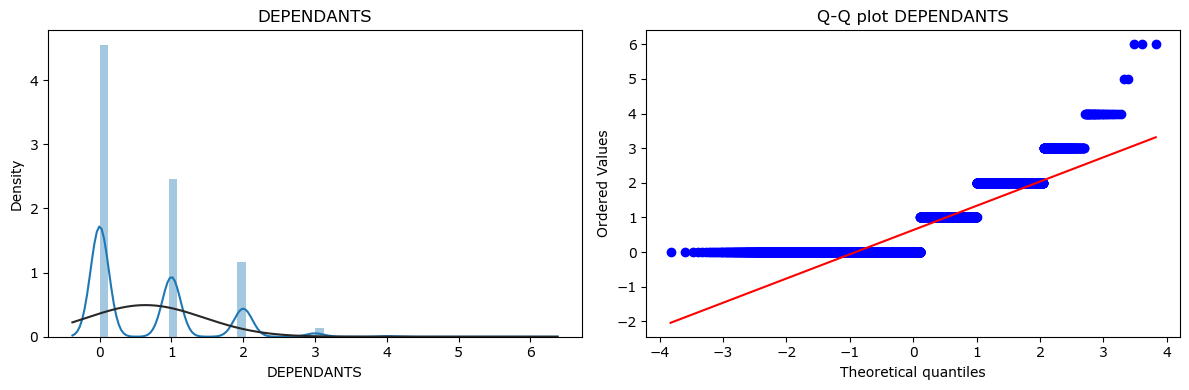

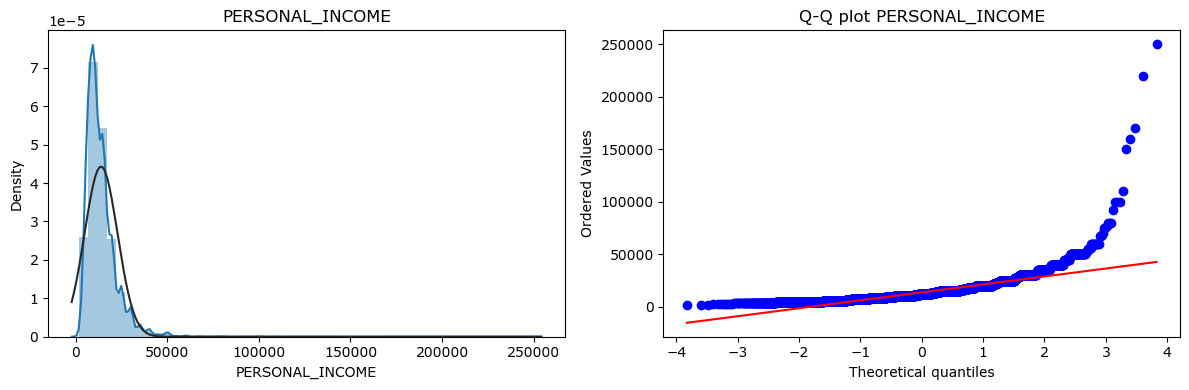

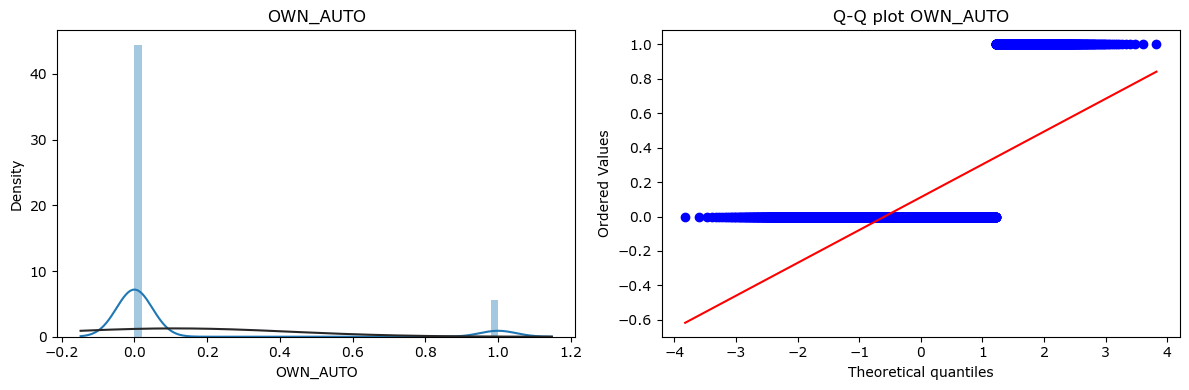

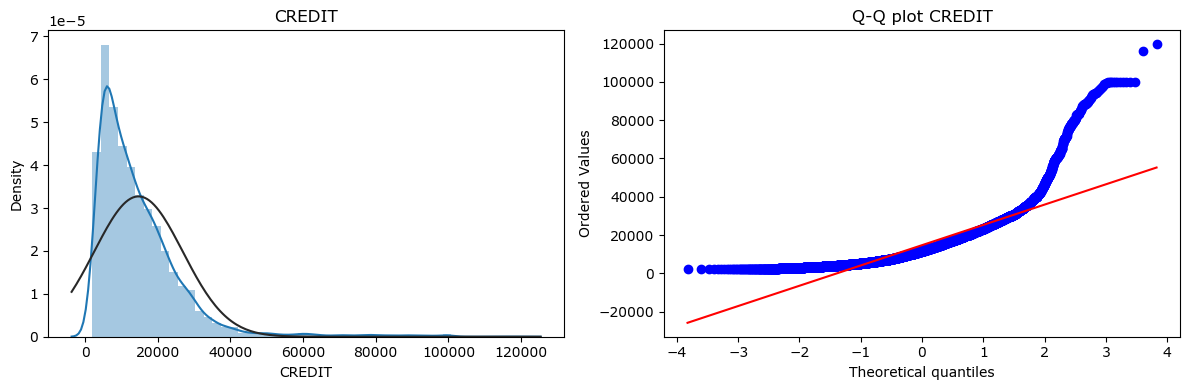

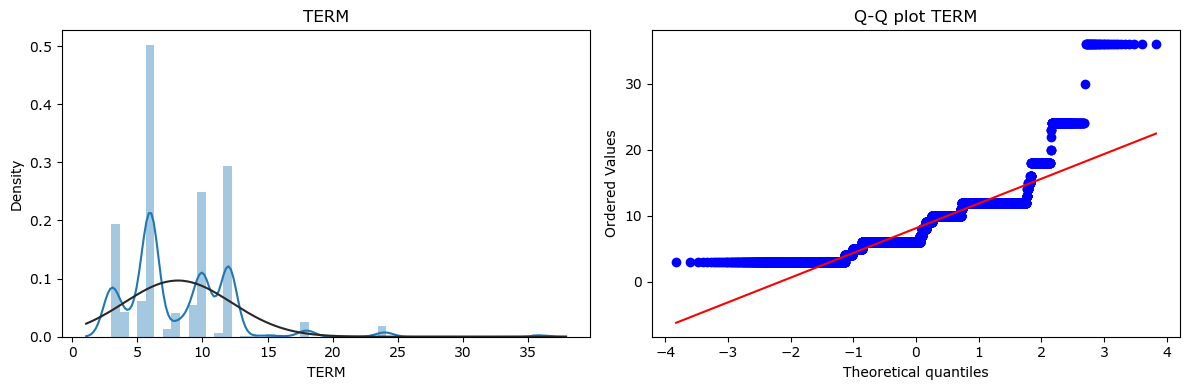

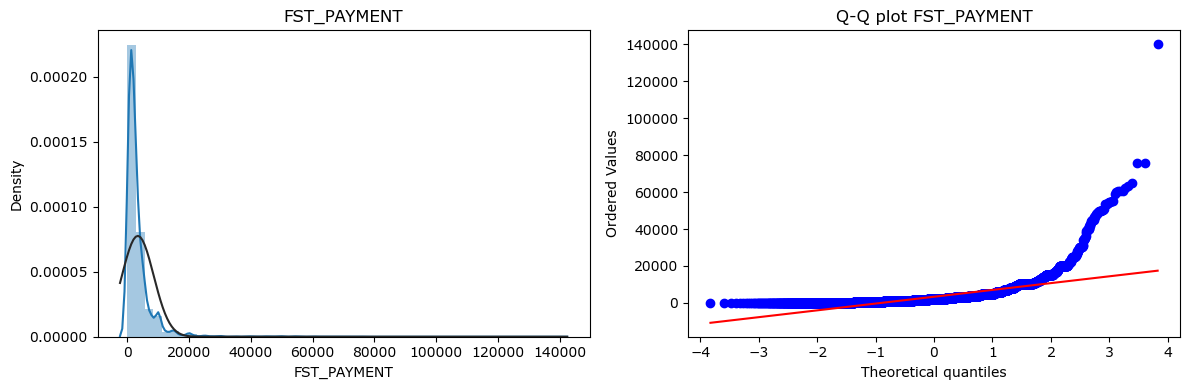

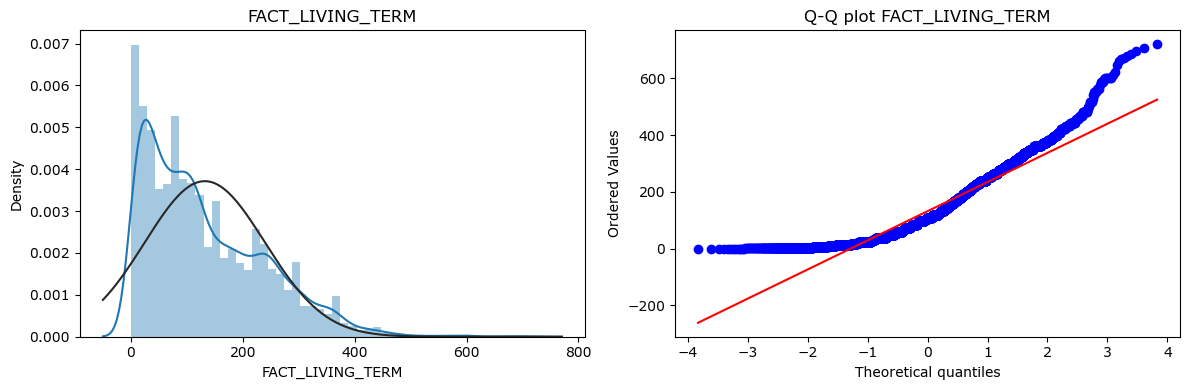

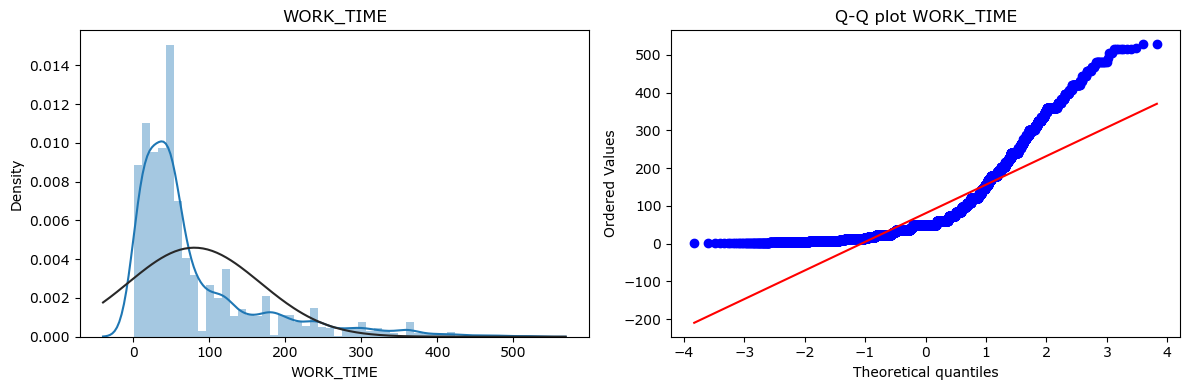

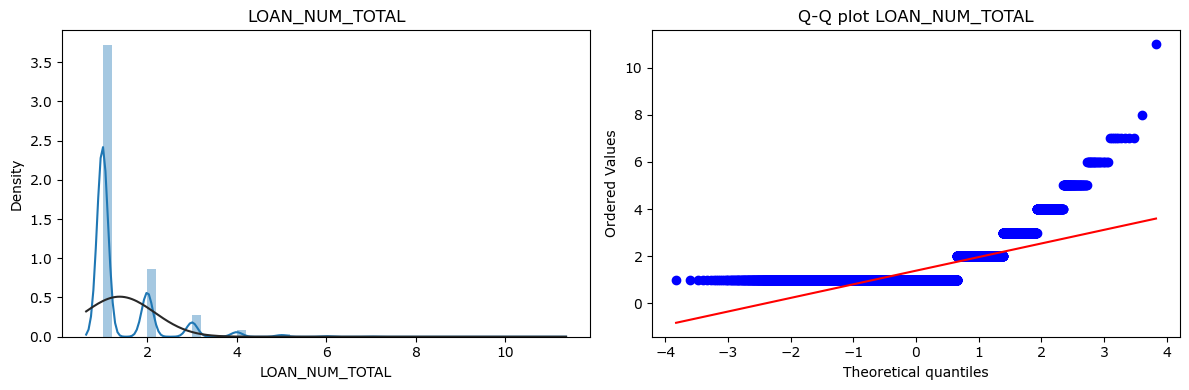

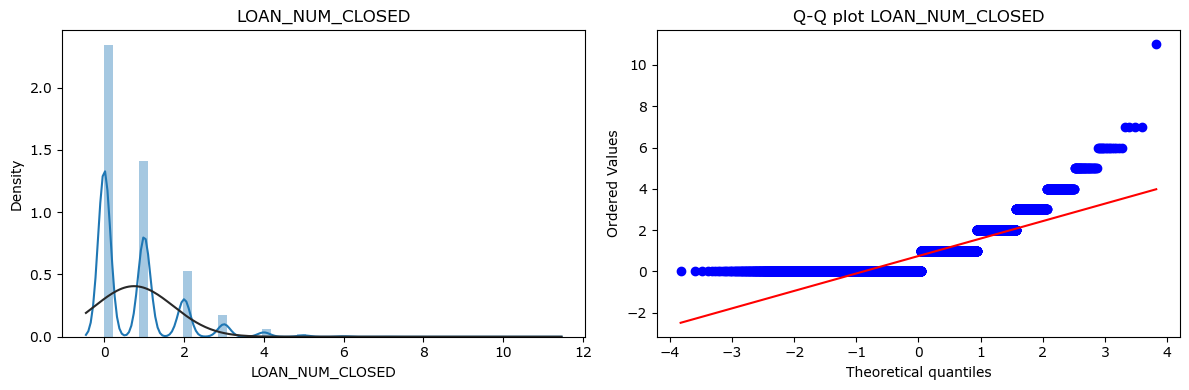

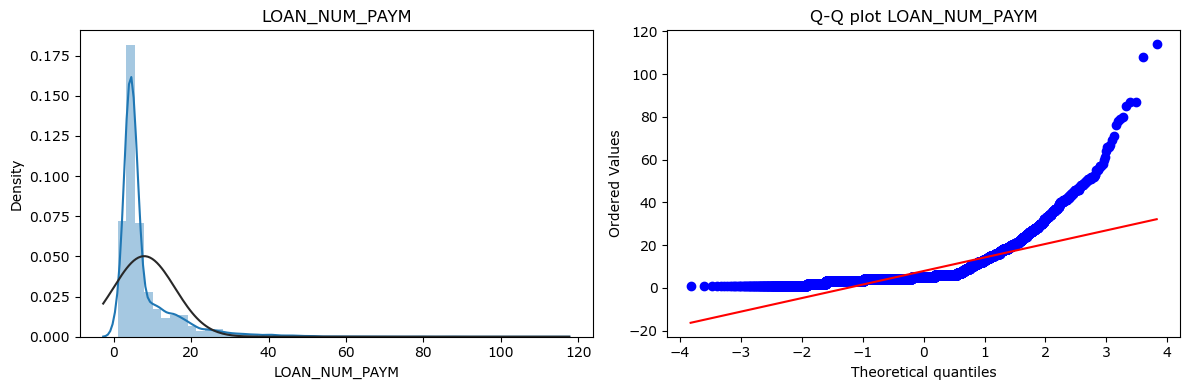

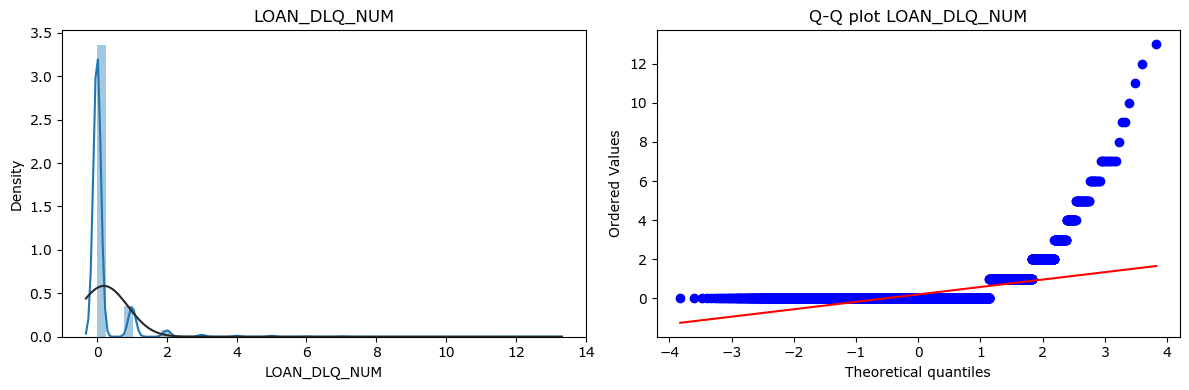

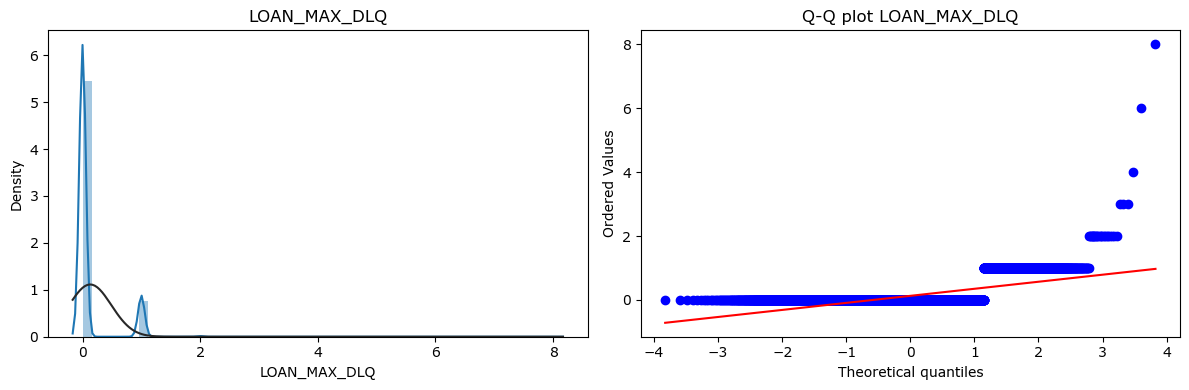

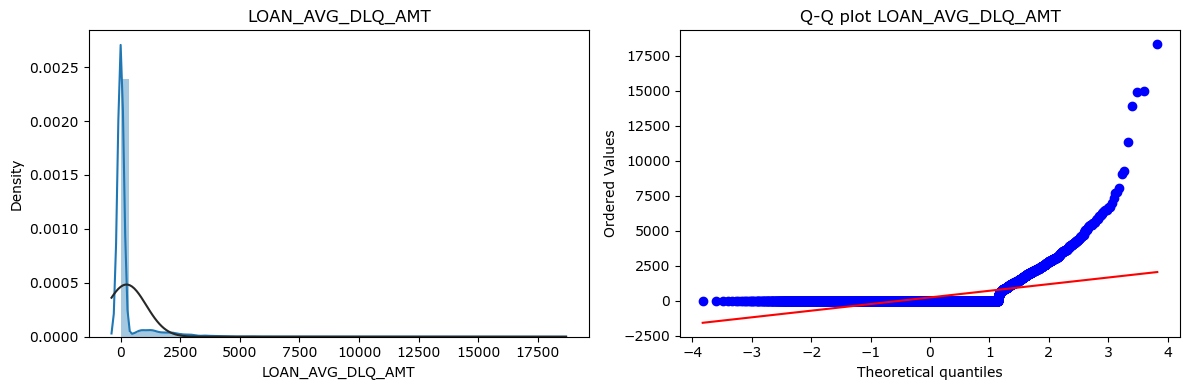

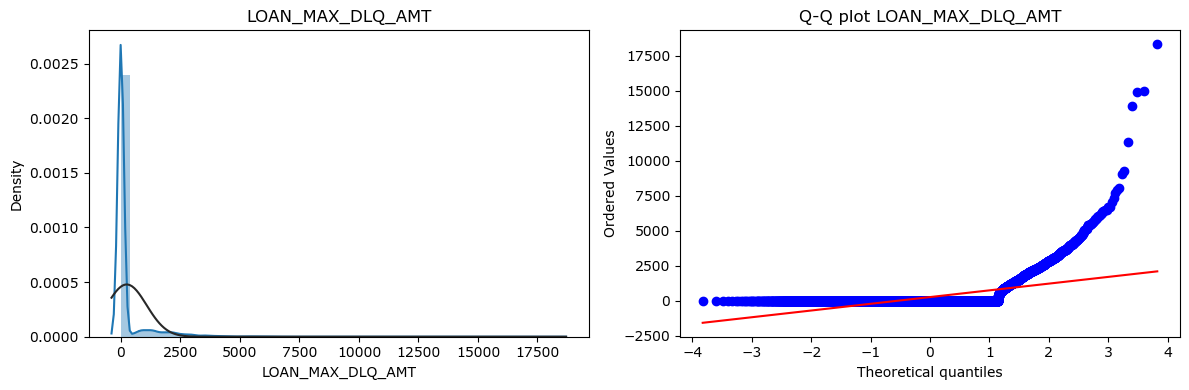

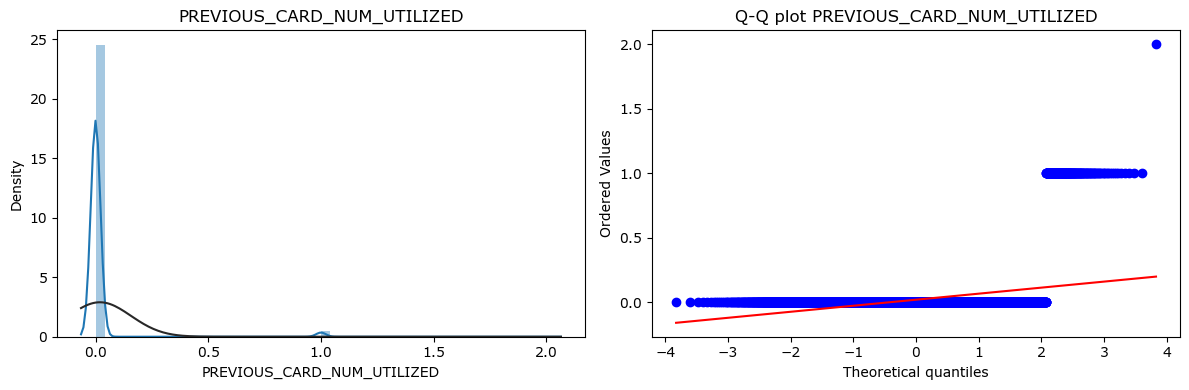

In [223]:
# строим гистограмму распределения и график квантиль-квантиль для переменных
num_col = [col for col in train.columns if train[col].dtype in ['int64', 'float64']]
for col in num_col:
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    sns.distplot(train[col], fit=norm, kde=True)
    plt.title(col)
    
    plt.subplot(1, 2, 2)
    stats.probplot(train[col], plot=plt)
    plt.title(f'Q-Q plot {col}')
    
    plt.tight_layout()
    plt.show()

1. **PERSONAL_INCOME** - посмотрим гистограмму распределения и график квантиль-квантиль. (лучше всего подошёл кубический корень)

Lambda_param: -0.204408


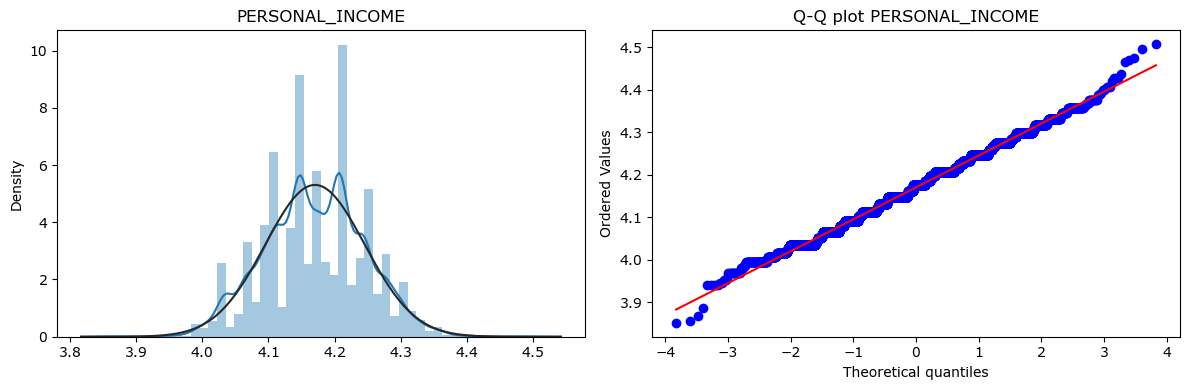

In [224]:
# импортируем функцию boxcox
from scipy.stats import boxcox
col = 'PERSONAL_INCOME'

# выполняем преобразование Бокса-Кокса
transformed_PERSONAL_INCOME, lam_PERSONAL_INCOME = boxcox(train[col])
print('Lambda_param: %f' % lam_PERSONAL_INCOME)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.distplot(transformed_PERSONAL_INCOME, fit=norm, kde=True)
plt.title(col)

plt.subplot(1, 2, 2)
stats.probplot(transformed_PERSONAL_INCOME, plot=plt)
plt.title(f'Q-Q plot {col}')

plt.tight_layout()
plt.show()

2. **CREDIT** - посмотрим гистограмму распределения и график квантиль-квантиль. (лучше всего подошёл)

Lambda_param: -0.039948


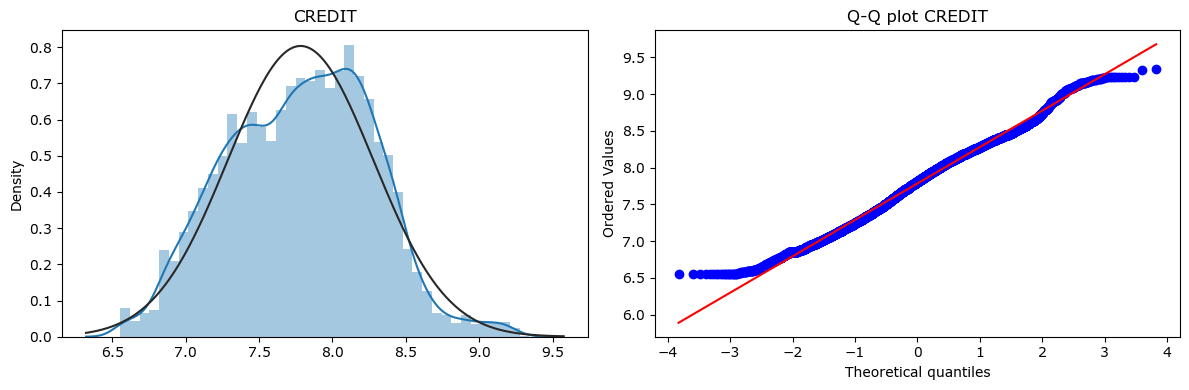

In [225]:
col = 'CREDIT'

# выполняем преобразование Бокса-Кокса
transformed_CREDIT, lam_CREDIT = boxcox(train[col])
print('Lambda_param: %f' % lam_CREDIT)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.distplot(transformed_CREDIT, fit=norm, kde=True)
plt.title(col)

plt.subplot(1, 2, 2)
stats.probplot(transformed_CREDIT, plot=plt)
plt.title(f'Q-Q plot {col}')

plt.tight_layout()
plt.show()

3. **FACT_LIVING_TERM** - посмотрим гистограмму распределения и график квантиль-квантиль. (лучше всего подошёл)

In [226]:
data['FACT_LIVING_TERM'].min()

0

Lambda_param: 0.373383


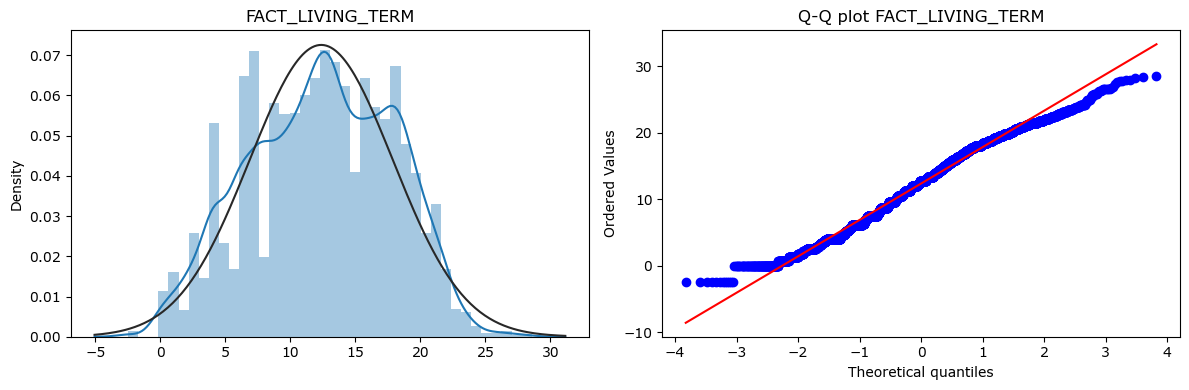

In [227]:
col = 'FACT_LIVING_TERM'

# выполняем преобразование Бокса-Кокса
a = 0.001
transformed_FACT_LIVING_TERM, lam_FACT_LIVING_TERM = boxcox(train[col] + a)
print('Lambda_param: %f' % lam_FACT_LIVING_TERM)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.distplot(transformed_FACT_LIVING_TERM, fit=norm, kde=True)
plt.title(col)

plt.subplot(1, 2, 2)
stats.probplot(transformed_FACT_LIVING_TERM, plot=plt)
plt.title(f'Q-Q plot {col}')

plt.tight_layout()
plt.show()

4. **WORK_TIME** - посмотрим гистограмму распределения и график квантиль-квантиль. (лучше всего подошёл)

In [228]:
print(f" Min:{data['WORK_TIME'].min():.3f}, Skew:{data['WORK_TIME'].skew():.3f}, Kurtosis:{data['WORK_TIME'].kurtosis():.3f}")

 Min:1.000, Skew:117.702, Kurtosis:13854.150


In [229]:
train['WORK_TIME'].describe()

count   10656.000
mean       80.257
std        86.845
min         1.000
25%        24.000
50%        48.000
75%        97.250
max       528.000
Name: WORK_TIME, dtype: float64

Lambda_param: 0.098865


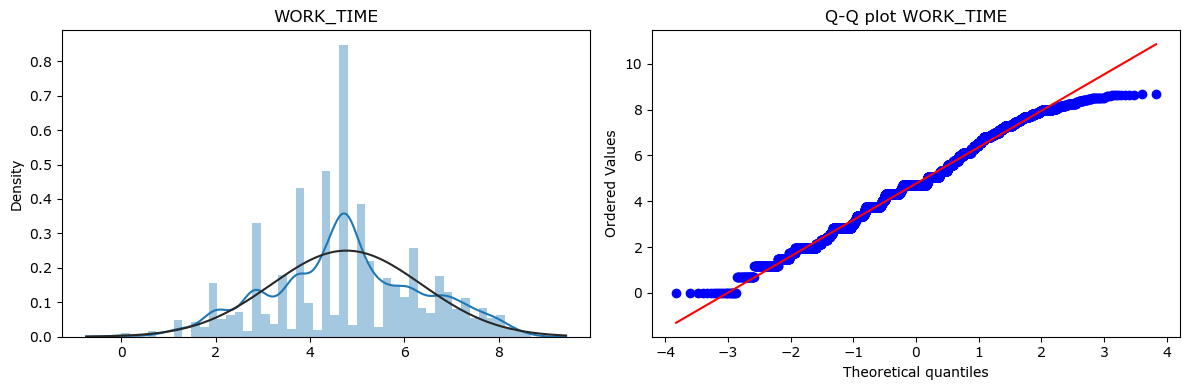

In [230]:
col = 'WORK_TIME'

# выполняем преобразование Бокса-Кокса
transformed_WORK_TIME, lam_WORK_TIME = boxcox(train[col])
print('Lambda_param: %f' % lam_WORK_TIME)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.distplot(transformed_WORK_TIME, fit=norm, kde=True)
plt.title(col)

plt.subplot(1, 2, 2)
stats.probplot(transformed_WORK_TIME, plot=plt)
plt.title(f'Q-Q plot {col}')

plt.tight_layout()
plt.show()

<h3>1.9 Биннинг как один из способов конструирования новых признаков, использующий результаты математических вычислений (нужно выполнять после разбиения на обучение и контроль)</h3>

1.1. На основе переменной **PERSONAL_INCOME** создаём временную переменную **PERSONAL_INCOME_CAT**, у которой метки категорий будут повторять **FAMILY_INCOME**

In [231]:
bins = [-np.inf, 5000, 10000, 20000, 50000, np.inf]
lab = ['до 5000 руб.', 'от 5000 до 10000 руб.', 'от 10000 до 20000 руб.', 'от 20000 до 50000 руб.', 'свыше 50000 руб.']
train['PERSONAL_INCOME_CAT'] = pd.cut(train['PERSONAL_INCOME'], bins, labels=lab)
test['PERSONAL_INCOME_CAT'] = pd.cut(test['PERSONAL_INCOME'], bins, labels=lab)

In [232]:
# выводим метки переменной PERSONAL_INCOME_CAT
train['PERSONAL_INCOME_CAT'].unique()

['от 10000 до 20000 руб.', 'от 20000 до 50000 руб.', 'от 5000 до 10000 руб.', 'до 5000 руб.', 'свыше 50000 руб.']
Categories (5, object): ['до 5000 руб.' < 'от 5000 до 10000 руб.' < 'от 10000 до 20000 руб.' < 'от 20000 до 50000 руб.' < 'свыше 50000 руб.']

1.2. Создаём *категориальную* переменную **PERSONAL_FAMILY_INCOME**, которая принимает значение 1, если категория переменной **PERSONAL_INCOME_CAT** совпадает с категорией переменной **FAMILY_INCOME**, или 0 в противоположном случае. И удалим временную переменную **PERSONAL_INCOME_CAT**

In [233]:
train['PERSONAL_FAMILY_INCOME'] = np.where(train['PERSONAL_INCOME_CAT'] == train['FAMILY_INCOME'],
                                          1, 0).astype('object')
test['PERSONAL_FAMILY_INCOME'] = np.where(test['PERSONAL_INCOME_CAT'] == test['FAMILY_INCOME'],
                                          1, 0).astype('object')
train.drop('PERSONAL_INCOME_CAT', axis=1, inplace=True)
test.drop('PERSONAL_INCOME_CAT', axis=1, inplace=True)

2. На основе биннинга создаём новые переменные **CREDIT, FST_PAYMENT и AGECAT**. С точки зрения бизнес-логики, как правило, сумма кредита, размер первого платежа и возраст являются одними из наиболее важных переменных, характеризующих клиента. Точки разбиения подбирались в программе Deductor.

In [234]:
#задаём точки, в которых будут находиться границы категорий будущей переменной CREDITCAT
bins = [-np.inf, 7292, 9427, 14169, 27449, np.inf]
# осуществляем биннинг переменной CREDIT и записываем результаты в новую переменную CREDITCAT
train['CREDITCAT'] = pd.cut(train['CREDIT'], bins).astype('object')
test['CREDITCAT'] = pd.cut(test['CREDIT'], bins).astype('object')

In [235]:
# задаем точки, в которых будут находиться границы категорий будущей переменной FSTPAYMENTCAT
bins = [-np.inf, 1500, 4995, np.inf]
# осуществляем биннинг переменной FST_PAYMENT и записываем результаты в новую переменную FSTPAYMENTCAT
train['FSTPAYMENTCAT'] = pd.cut(train['FST_PAYMENT'], bins).astype('object')
test['FSTPAYMENTCAT'] = pd.cut(test['FST_PAYMENT'], bins).astype('object')

In [236]:
# задаем точки, в которых будут находиться границы категорий будущей переменной AGECAT
bins = [-np.inf, 29, 43, 52, 57, np.inf]
# осуществляем биннинг переменной AGE и записываем результаты в новую переменную AGECAT
train['AGECAT'] = pd.cut(train['AGE'], bins).astype('object')
test['AGECAT'] = pd.cut(test['AGE'], bins).astype('object')

3. Вычисляем IV по всем количественным переменным, предварительно категоризированным на 10 квантилей. Данное действие даст дополнительную информацию о том, на основе каких переменных можно ещё создать новые переменные с помощью биннинга.

In [237]:
# пишем функцию, вычисляющую IV по всем
# количественным предикторам
def numeric_IV(df):
    iv_list = []
    a = 0.0001
    numerical_columns = [c for c in df.columns if df[c].dtype.name != 'object']
    for var_name in numerical_columns:
        df[var_name] = pd.qcut(df[var_name].values, 10, duplicates='drop').codes
        biv = pd.crosstab(df[var_name], df['TARGET'])
        IV = sum(((1.0 * biv[0] / sum(biv[0]) + a) - (1.0 * biv[1] / sum(biv[1]) + a)) *
                 np.log((1.0 * biv[0] / sum(biv[0]) + a) / (1.0 * biv[1] / sum(biv[1]) + a)))
        iv_list.append(IV)
    col_list = list(numerical_columns)
    results = pd.DataFrame({'Название переменной': col_list, 'IV': iv_list})
    results['Полезность'] = ['Подозрительно высокая' if x > 0.5 else 'Сильная'
                             if x <= 0.5 and x > 0.3 else 'Средняя'
                             if x <= 0.3 and x > 0.1 else 'Слабая'
                             if x <= 0.1 and x > 0.02 else 'Бесполезная'
                             for x in results['IV']]  # по Наиму Сиддики
    return(results.sort_values(by='IV', ascending=False))

In [238]:
# применяем нашу функцию к обучающему набору
train_copy = train.copy()
numeric_IV(train_copy)

,Название переменной,IV,Полезность
0,AGE,0.136,Средняя
9,WORK_TIME,0.112,Средняя
3,PERSONAL_INCOME,0.096,Слабая
8,FACT_LIVING_TERM,0.060,Слабая
6,TERM,0.052,Слабая
12,LOAN_NUM_PAYM,0.046,Слабая
15,LOAN_AVG_DLQ_AMT,0.042,Слабая
16,LOAN_MAX_DLQ_AMT,0.041,Слабая
7,FST_PAYMENT,0.029,Слабая
5,CREDIT,0.026,Слабая


4. Выполним укрупнение категорий **GEN_TITLE**. Для укрупнения используем метод CHAID.

In [239]:
print(train['GEN_TITLE'].value_counts(), test['GEN_TITLE'].value_counts())

GEN_TITLE
Специалист                        4813
Рабочий                           2151
Не указано                        1010
Служащий                           662
Руководитель среднего звена        489
Работник сферы услуг               405
Высококвалифиц. специалист         381
Руководитель высшего звена         305
Другое                             188
Индивидуальный предприниматель     156
Руководитель низшего звена          96
Name: count, dtype: int64 GEN_TITLE
Специалист                        2198
Рабочий                            924
Не указано                         356
Служащий                           242
Руководитель среднего звена        208
Высококвалифиц. специалист         168
Работник сферы услуг               158
Руководитель высшего звена         122
Другое                              90
Индивидуальный предприниматель      61
Руководитель низшего звена          40
Name: count, dtype: int64


In [240]:
# пишем функцию, которая создаёт из списка списков словарь
def list_to_dict(input_list):
    output_dict = {}
    for n, sample_list in enumerate(input_list):
        for value in sample_list:
            output_dict[value] = n
    return output_dict
# создаём список списков для переменной **GEN_TITLE**
map_data_list = [
    ['Рабочий',
    'Служащий',
    'Работник сферы услуг',
    'Другое',
    'Индивидуальный предприниматель',
    'Руководитель низшего звена'],
    ['Специалист',
     'Руководитель среднего звена'],
    ['Не указано'], 
    ['Высококвалифиц. специалист', 'Руководитель высшего звена']
]
# создаём из списка списков словарь
map_data_dict = list_to_dict(map_data_list)

# укрупняем категории переменной GEN_TITLE
train['GEN_TITLE'] = train['GEN_TITLE'].map(map_data_dict).astype('object')
test['GEN_TITLE'] = test['GEN_TITLE'].map(map_data_dict).astype('object')

# смотрим результат укрупнения на обучающей выборке
train['GEN_TITLE'].value_counts(dropna=False)

GEN_TITLE
1    5302
0    3658
2    1010
3     686
Name: count, dtype: int64

5. На основе переменной **REGION_NM** создаём новую переменную **REGIONCAT** с укрупнёнными категориями. Для укрупнения используем метод CHAID.

In [241]:
print(train['REGION_NM'].value_counts(), test['REGION_NM'].value_counts())

REGION_NM
ПРИВОЛЖСКИЙ           1897
ЮЖНЫЙ                 1495
ЦЕНТРАЛЬНЫЙ 2         1374
ЗАПАДНО-СИБИРСКИЙ     1273
ЦЕНТРАЛЬНЫЙ 1         1154
ВОСТОЧНО-СИБИРСКИЙ     890
УРАЛЬСКИЙ              830
ДАЛЬНЕВОСТОЧНЫЙ        814
СЕВЕРО-ЗАПАДНЫЙ        719
ЦЕНТРАЛЬНЫЙ ОФИС       209
Не указано               1
Name: count, dtype: int64 REGION_NM
ПРИВОЛЖСКИЙ           809
ЮЖНЫЙ                 684
ЗАПАДНО-СИБИРСКИЙ     562
ЦЕНТРАЛЬНЫЙ 2         560
ЦЕНТРАЛЬНЫЙ 1         499
ВОСТОЧНО-СИБИРСКИЙ    366
УРАЛЬСКИЙ             365
ДАЛЬНЕВОСТОЧНЫЙ       327
СЕВЕРО-ЗАПАДНЫЙ       309
ЦЕНТРАЛЬНЫЙ ОФИС       86
Name: count, dtype: int64


In [242]:
# Выполним перед этим импутацию значений 'Не указано' модой признака.
most_frequent_region_nm = train['REGION_NM'].mode()[0]
train['REGION_NM'] = train['REGION_NM'].replace('Не указано', most_frequent_region_nm)
test['REGION_NM'] = test['REGION_NM'].replace('Не указано', most_frequent_region_nm)

# проверяем замену
print(train['REGION_NM'].value_counts(), test['REGION_NM'].value_counts())

REGION_NM
ПРИВОЛЖСКИЙ           1898
ЮЖНЫЙ                 1495
ЦЕНТРАЛЬНЫЙ 2         1374
ЗАПАДНО-СИБИРСКИЙ     1273
ЦЕНТРАЛЬНЫЙ 1         1154
ВОСТОЧНО-СИБИРСКИЙ     890
УРАЛЬСКИЙ              830
ДАЛЬНЕВОСТОЧНЫЙ        814
СЕВЕРО-ЗАПАДНЫЙ        719
ЦЕНТРАЛЬНЫЙ ОФИС       209
Name: count, dtype: int64 REGION_NM
ПРИВОЛЖСКИЙ           809
ЮЖНЫЙ                 684
ЗАПАДНО-СИБИРСКИЙ     562
ЦЕНТРАЛЬНЫЙ 2         560
ЦЕНТРАЛЬНЫЙ 1         499
ВОСТОЧНО-СИБИРСКИЙ    366
УРАЛЬСКИЙ             365
ДАЛЬНЕВОСТОЧНЫЙ       327
СЕВЕРО-ЗАПАДНЫЙ       309
ЦЕНТРАЛЬНЫЙ ОФИС       86
Name: count, dtype: int64


In [243]:
# создаём список списков для переменной REGION_NM
map_data_list2 = [
    ['ЮЖНЫЙ', 'ЦЕНТРАЛЬНЫЙ 1', 'ЦЕНТРАЛЬНЫЙ 2'],
    ['ЗАПАДНО-СИБИРСКИЙ', 'ВОСТОЧНО-СИБИРСКИЙ', 'УРАЛЬСКИЙ',
     'ДАЛЬНЕВОСТОЧНЫЙ', 'СЕВЕРО-ЗАПАДНЫЙ', 'ЦЕНТРАЛЬНЫЙ ОФИС'],
    ['ПРИВОЛЖСКИЙ']
]

# создаем из списка списков словарь
map_data_dict2 = list_to_dict(map_data_list2)

# на основе укрупнения категорий переменной REGION_NM 
# создадим переменную REGIONCAT
train['REGIONCAT'] = train['REGION_NM'].map(map_data_dict2).astype('object')
test['REGIONCAT'] = test['REGION_NM'].map(map_data_dict2).astype('object')

# смотрим новую переменную в обучающей выборке
train['REGIONCAT'].value_counts(dropna=False)

REGIONCAT
1    4735
0    4023
2    1898
Name: count, dtype: int64

6. На основе переменной **ORG_TP_STATE** создаём новую переменную **ORGCAT** с укрупнённой категорией. Для укрупнения используем метод CHAID.

In [244]:
print(train['ORG_TP_STATE'].value_counts(), test['ORG_TP_STATE'].value_counts())

ORG_TP_STATE
Частная компания                  4550
Государственная комп./учреж.      4263
Не указано                        1010
Индивидуальный предприниматель     663
Некоммерческая организация         170
Name: count, dtype: int64 ORG_TP_STATE
Частная компания                  1995
Государственная комп./учреж.      1849
Не указано                         356
Индивидуальный предприниматель     294
Некоммерческая организация          73
Name: count, dtype: int64


In [245]:
# создаем список списков для переменной ORG_TP_STATE
map_data_list3 = [
    ['Частная компания', 'Индивидуальный предприниматель', 'Некоммерческая организация'],
    ['Не указано'],
    ['Государственная комп./учреж.']
]

# создаем из списка списков словарь
map_data_dict3 = list_to_dict(map_data_list3)

# на основе укрупнения категорий переменной ORG_TP_STATE
# создаем переменную ORGCAT
train['ORGCAT'] = train['ORG_TP_STATE'].map(map_data_dict3).astype('object')
test['ORGCAT'] = test['ORG_TP_STATE'].map(map_data_dict3).astype('object')

# смотрим новую переменную в обучающей выборке
train['ORGCAT'].value_counts(dropna=False)

ORGCAT
0    5383
2    4263
1    1010
Name: count, dtype: int64

<h3>1.10 Выполнение преобразований, исходя из информации гистрограмм распределения и графиков квантиль-квантиль</h3>

In [246]:
# Используем этот способ, так как он интегрируется в Pipline, выполняя все те же функции, что и scipy.stats boxcox.
from sklearn.preprocessing import PowerTransformer

# Список колонок, которые нужно трансформировать
cols_to_transform = ['PERSONAL_INCOME', 'CREDIT', 'FACT_LIVING_TERM', 'WORK_TIME']

# Создаём трансформер
pt_bc = PowerTransformer(method='box-cox')

# Обучаем на train и трансформируем train
a = 0.001

train[cols_to_transform] = pt_bc.fit_transform(train[cols_to_transform] + a)

# Трансформируем test
test[cols_to_transform] = pt_bc.transform(test[cols_to_transform] + a)

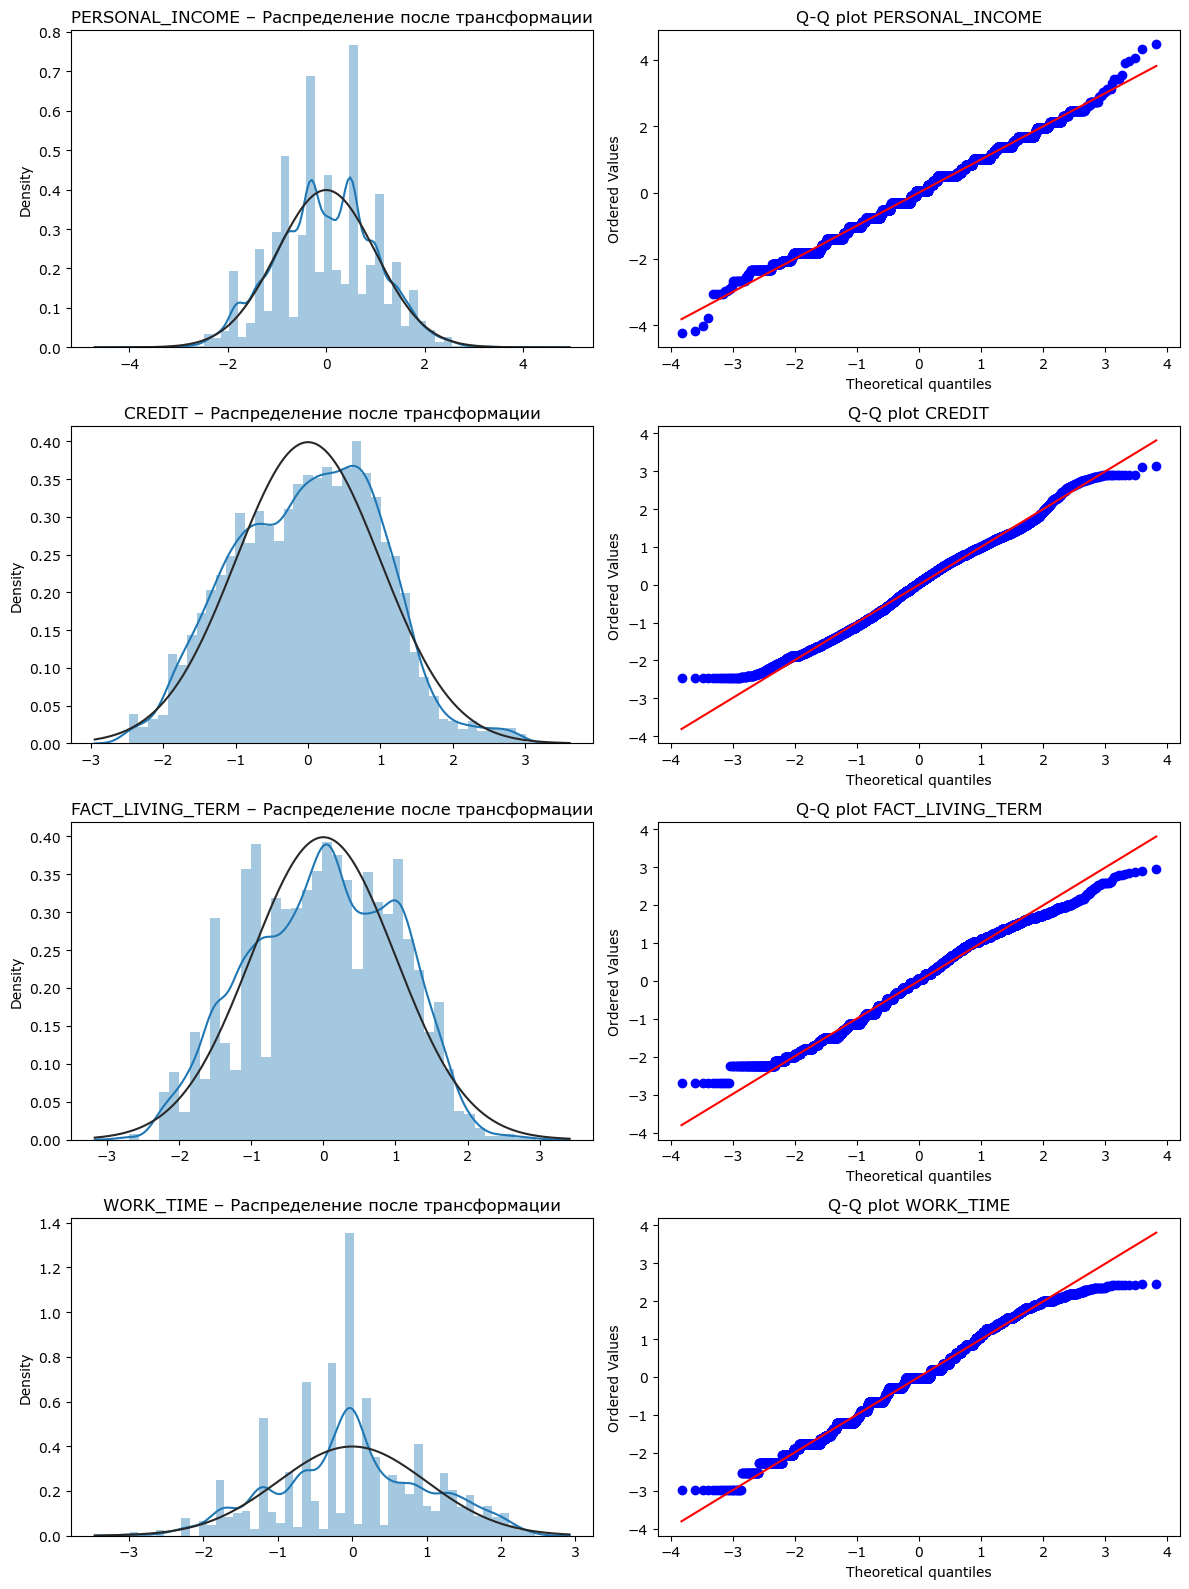

In [247]:
# Визуализация
fig, axes = plt.subplots(len(cols_to_transform), 2, figsize=(12, 4 * len(cols_to_transform)))

for i, col in enumerate(cols_to_transform):
    datas = train[col].values
    
    # Гистограмма + нормальное распределение
    sns.distplot(datas, fit=stats.norm, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'{col} – Распределение после трансформации')
    
    # Q-Q plot
    stats.probplot(datas, plot=axes[i, 1])
    axes[i, 1].set_title(f'Q-Q plot {col}')

plt.tight_layout()
plt.show()

<h3>1.11 Конструирование новых признаков</h3>

Выполним конструирование новых признаков:
1. **CHILD_DEP** – отношение количества детей **CHILD_TOTAL** к общему количеству детей и иждивенцев **CHILD_TOTAL и DEPENDANTS**
2. **PAYMENT** – сумму ежемесячного взноса по кредиту, разделив сумму кредита **CREDIT** на срок кредита **TERM**
3. **PTI** – коэффициент долговой нагрузки, разделив сумму ежемесячного взноса по кредиту **PAYMENT** на личный доход **PERSONAL_INCOME**
4. **CLOSED_TO_TOTAL** – коэффициент погашения ссуд, разделив количество погашенных ссуд **LOAN_NUM_CLOSED** на общее количество ссуд **LOAN_NUM_TOTAL**
5. **PAYM_TO_LOAN** – отношение количества платежей **LOAN_NUM_PAYM** к общему количеству ссуд **LOAN_NUM_TOTAL**
6. **DLQ_TO_PAYM** – отношение количества просрочек **LOAN_DLQ_NUM** к общему количеству платежей **LOAN_NUM_PAYM**
7. **FST_SHARE** – отношение суммы первого платежа по кредиту к объединенной сумме первого платежа **FST_PAYMENT** и кредита **CREDIT**
8. **DLQ_TIME** – индекс времени наступления максимальной просрочки, разделив номер максимальной просрочки **LOAN_MAX_DLQ** на количество просрочек **LOAN_DLQ_NUM**
9. **LOAN_MAX_DLQ_RANGE** – разницу между максимальной суммой просрочки **LOAN_MAX_DLQ_AMT** и средней суммой просрочки **LOAN_AVG_DLQ_AMT**

In [248]:
#1
train['CHILD_DEP'] = train['CHILD_TOTAL'] / (train['CHILD_TOTAL'] + train['DEPENDANTS'])
test['CHILD_DEP'] = test['CHILD_TOTAL'] / (test['CHILD_TOTAL'] + test['DEPENDANTS'])

# если переменная содержит пропуск, то возвращается значение 0, 
# если пропуска нет, то возвращается исходное значение переменной
train['CHILD_DEP'] = np.where(train['CHILD_DEP'].isnull(), 0, train['CHILD_DEP'])
test['CHILD_DEP'] = np.where(test['CHILD_DEP'].isnull(), 0, test['CHILD_DEP'])

#2
train['PAYMENT'] = train['CREDIT'] / train['TERM']
test['PAYMENT'] = test['CREDIT'] / test['TERM']

#3
train['PTI'] = train['PAYMENT'] / train['PERSONAL_INCOME']
test['PTI'] = test['PAYMENT'] / test['PERSONAL_INCOME']

#4
train['CLOSED_TO_TOTAL'] = train['LOAN_NUM_CLOSED'] / train['LOAN_NUM_TOTAL']
test['CLOSED_TO_TOTAL'] = test['LOAN_NUM_CLOSED'] / test['LOAN_NUM_TOTAL']

#5
train['PAYM_TO_LOAN'] = train['LOAN_NUM_PAYM'] / train['LOAN_NUM_TOTAL']
test['PAYM_TO_LOAN'] = test['LOAN_NUM_PAYM'] / test['LOAN_NUM_TOTAL']

#6
train['DLQ_TO_PAYM'] = train['LOAN_DLQ_NUM'] / train['LOAN_NUM_PAYM']
test['DLQ_TO_PAYM'] = test['LOAN_DLQ_NUM'] / test['LOAN_NUM_PAYM']

#7
train['FST_SHARE'] = train['FST_PAYMENT'] / (train['FST_PAYMENT'] + train['CREDIT'])
test['FST_SHARE'] = test['FST_PAYMENT'] / (test['FST_PAYMENT'] + test['CREDIT'])

#8
train['DLQ_TIME'] = train['LOAN_MAX_DLQ'] / train['LOAN_DLQ_NUM']
test['DLQ_TIME'] = test['LOAN_MAX_DLQ'] / test['LOAN_DLQ_NUM']

# если переменная содержит пропуск, то возвращается значение 0, 
# если пропуска нет, то возвращается исходное значение переменной                  
train['DLQ_TIME'] = np.where(train['DLQ_TIME'].isnull(), 0, train['DLQ_TIME'])
test['DLQ_TIME'] = np.where(test['DLQ_TIME'].isnull(), 0, test['DLQ_TIME'])

#9
train['LOAN_MAX_DLQ_RANGE'] = ((train['LOAN_MAX_DLQ_AMT'] - train['LOAN_AVG_DLQ_AMT']) / 
                               train['LOAN_AVG_DLQ_AMT']).abs()
test['LOAN_MAX_DLQ_RANGE'] = ((test['LOAN_MAX_DLQ_AMT'] - test['LOAN_AVG_DLQ_AMT']) / 
                              test['LOAN_AVG_DLQ_AMT']).abs()

# если переменная содержит пропуск, то возвращается значение 0, 
# если пропуска нет, то возвращается исходное значение переменной
train['LOAN_MAX_DLQ_RANGE'] = np.where(train['LOAN_MAX_DLQ_RANGE'].isnull(), 0, 
                                       train['LOAN_MAX_DLQ_RANGE'])
test['LOAN_MAX_DLQ_RANGE'] = np.where(test['LOAN_MAX_DLQ_RANGE'].isnull(), 0, 
                                      test['LOAN_MAX_DLQ_RANGE'])

<h3>1.12 Стандартизация</h3>

In [249]:
# Выполним стандартизацию количественных переменных
num_cols = [c for c in train.columns if train[c].dtype.name != 'object']
train_copy = train.copy()
for i in num_cols:
    train[i] = (train[i] - train[i].mean()) / train[i].std()
    test[i] = (test[i] - train_copy[i].mean()) / train_copy[i].std()

In [250]:
# Убедимся, что наши новые переменные не содержат пропусков
print(train.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0


<h3>1.13 Дамми-кодирование</h3>

In [251]:
# печатаем названия столбцов до и после
# дамми-кодирования
print("Исходные переменные:\n", list(train.columns), "\n")
train_dummies = pd.get_dummies(train)
print("Переменные после get_dummies:\n", list(train_dummies.columns))

print("Исходные переменные:\n", list(test.columns), "\n")
test_dummies = pd.get_dummies(test)
print("Переменные после get_dummies:\n", list(test_dummies.columns))

Исходные переменные:
 ['TARGET', 'AGE', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS', 'EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'PERSONAL_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'REG_FACT_FL', 'FACT_POST_FL', 'REG_POST_FL', 'REG_FACT_POST_FL', 'REG_FACT_POST_TP_FL', 'FL_PRESENCE_FL', 'OWN_AUTO', 'AUTO_RUS_FL', 'HS_PRESENCE_FL', 'COT_PRESENCE_FL', 'GAR_PRESENCE_FL', 'LAND_PRESENCE_FL', 'CREDIT', 'TERM', 'FST_PAYMENT', 'GPF_DOCUMENT_FL', 'FACT_LIVING_TERM', 'WORK_TIME', 'FACT_PHONE_FL', 'REG_PHONE_FL', 'GEN_PHONE_FL', 'LOAN_NUM_TOTAL', 'LOAN_NUM_CLOSED', 'LOAN_NUM_PAYM', 'LOAN_DLQ_NUM', 'LOAN_MAX_DLQ', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT', 'PREVIOUS_CARD_NUM_UTILIZED', 'FACT_TP_FL', 'AUTO_FOR_FL', 'GENDER+GAR_PRESENCE_FL', 'REG_FACT_FL+GAR_PRESENCE_FL', 'PERSONAL_FAMILY_INCOME', 'CREDITCAT', 'FSTPAYM

<h3>1.14 Подготовка массивов признаков и массивов меток зависимой переменной</h3>

In [252]:
# создаем обучающий и контрольный массивы меток
y_train = train_dummies.loc[:, 'TARGET_1']
y_test = test_dummies.loc[:, 'TARGET_1']
# удаляем из будущих массивов признаков результаты
# дамми-кодирования зависимой переменной -
# TARGET_0 и TARGET_1
train_dummies.drop(['TARGET_0', 'TARGET_1'], axis=1, inplace=True)
test_dummies.drop(['TARGET_0', 'TARGET_1'], axis=1, inplace=True)
# создаем обучающий и контрольный массивы признаков
X_train = train_dummies.loc[:, 'AGE':'ORGCAT_2']
X_test = test_dummies.loc[:, 'AGE':'ORGCAT_2']

<h3>1.15 Построение логистической регрессии с помощью класса LogisticRegression библиотеки scikit-learn</h3>

In [253]:
# импортируем класс LogisticRegression
from sklearn.linear_model import LogisticRegression

In [254]:
# импортируем функцию roc_auc_score
from sklearn.metrics import roc_auc_score
# строим логистическую регрессию
logreg = LogisticRegression().fit(X_train, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.747
AUC на контрольной выборке: 0.691


In [255]:
# строим логистическую регрессию,
# используем l1-регуляризацию (лассо), которая
# устанавливают некоторые оценки коэффициентов 
# регрессии точно в нуле и тем самым осуществляет 
# отбор переменных
logreg = LogisticRegression(C=0.12, penalty='l2').fit(X_train, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.742
AUC на контрольной выборке: 0.694


<h3>1.16. Настройка гиперпараметров логистической регрессии с помощью класса GridSearchCV</h3>

In [256]:
# импортируем класс StratifiedKFold для выполнения
# статифицированной перекрестной проверки (т.е. в
# каждом блоке соблюдаются исходные пропорции классов)
from sklearn.model_selection import StratifiedKFold
# создаем экземпляр класса StratifiedKFold, 10-блочную
# перекрестную проверку со случайным перемешиванием данных
strat = StratifiedKFold(n_splits=10, shuffle=True, 
                        random_state=42)
# импортируем класс GridSearchCV
from sklearn.model_selection import GridSearchCV
# создаем экземпляр класса LogisticRegression,
# логистическую регрессию с L1-регуляризацией
logreg_grid = LogisticRegression(penalty='l2', random_state=42)
# задаем сетку гиперпараметров, будем перебирать 
# разные значения штрафа
param_grid = {'C': [0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32]}

In [257]:
# создаем экземпляр класса GridSearchCV
grid_search = GridSearchCV(logreg_grid, param_grid, 
                           scoring='roc_auc', 
                           return_train_score=True,
                           n_jobs=-1, cv=strat)
# запускаем решетчатый поиск
grid_search.fit(X_train, y_train)
# проверяем модель со значением гиперпараметра, дающим наибольшее
# значение AUC (усредненное по контрольным блокам перекрестной
# проверки), на тестовой выборке
test_score = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])
# смотрим результаты решетчатого поиска
print("AUC на тестовой выборке: {:.3f}".format(test_score))
print("Наилучшее значение гиперпараметра C: {}".format(grid_search.best_params_))
print("Наилучшее значение AUC: {:.3f}".format(grid_search.best_score_))

AUC на тестовой выборке: 0.693
Наилучшее значение гиперпараметра C: {'C': 0.18}
Наилучшее значение AUC: 0.694


In [258]:
# преобразуем результаты поиска в датафрейм и выведем их
results = pd.DataFrame(grid_search.cv_results_)
table = results.pivot_table(values = ['mean_test_score'],
                            index = ['param_C'])
print(table)

         mean_test_score
param_C                 
0.180              0.694
0.200              0.694
0.220              0.694
0.240              0.694
0.260              0.693
0.280              0.693
0.300              0.693
0.320              0.693


<h3>1.17 Отбор признаков для логистической регрессии с помощью случайного леса (класса RFE)</h3>

<h4>1.17.1 Отбор признаков для логистической регрессии с помозью случайного леса (класса RFE)</h4>
Построим случайный лес из 200 деревьев глубиной 10 и отберём 100 наиболее важных предикторов

In [259]:
# импортируем класс RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# импортируем класс RFE
from sklearn.feature_selection import RFE
# создаём экземпляр класса RFE, отберём первые 100 переменных с помощью случайного леса
select = RFE(RandomForestClassifier(n_estimators=200, max_depth=10,
                                    random_state=42, n_jobs=-1),
             n_features_to_select=100)
# обучаем модель и применяем к нашим массивам
select.fit(X_train, y_train)
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

In [260]:
# смотрим форму массива
print("Форма исходного обучающего массива: {}".format(str(X_train_rfe.shape)))
print("Форма исходного тестового массива: {}".format(str(X_test_rfe.shape)))

Форма исходного обучающего массива: (10656, 100)
Форма исходного тестового массива: (4567, 100)


In [261]:
# смотрим, какие переменные были отобраны
mask = select.get_support()
feat_labels = X_train.columns
for c, feature in zip(mask, feat_labels):
    print(feature, c)

AGE True
CHILD_TOTAL True
DEPENDANTS True
PERSONAL_INCOME True
OWN_AUTO True
CREDIT True
TERM True
FST_PAYMENT True
FACT_LIVING_TERM True
WORK_TIME True
LOAN_NUM_TOTAL True
LOAN_NUM_CLOSED True
LOAN_NUM_PAYM True
LOAN_DLQ_NUM True
LOAN_MAX_DLQ True
LOAN_AVG_DLQ_AMT True
LOAN_MAX_DLQ_AMT True
PREVIOUS_CARD_NUM_UTILIZED True
CHILD_DEP True
PAYMENT True
PTI True
CLOSED_TO_TOTAL True
PAYM_TO_LOAN True
DLQ_TO_PAYM True
FST_SHARE True
DLQ_TIME True
LOAN_MAX_DLQ_RANGE True
SOCSTATUS_WORK_FL_0 False
SOCSTATUS_WORK_FL_1 False
SOCSTATUS_PENS_FL_0 True
SOCSTATUS_PENS_FL_1 True
GENDER_0 True
GENDER_1 True
EDUCATION_Высшее True
EDUCATION_Неоконченное высшее True
EDUCATION_Неполное среднее False
EDUCATION_Среднее True
EDUCATION_Среднее специальное True
MARITAL_STATUS_Вдовец/Вдова False
MARITAL_STATUS_Гражданский брак False
MARITAL_STATUS_Не состоял в браке True
MARITAL_STATUS_Разведен(а) True
MARITAL_STATUS_Состою в браке True
GEN_INDUSTRY_Банк/Финансы False
GEN_INDUSTRY_Государственная служба True


<h4>1.17.2 Построение логистической регрессии по массиву признаков, отобранных с помощью случайного леса (класса RFE)</h4>

In [262]:
logreg = LogisticRegression().fit(X_train_rfe, y_train)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train_rfe)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test_rfe)[:, 1])))

AUC на обучающей выборке: 0.725
AUC на контрольной выборке: 0.702


<h4>1.17.3 Настройка гиперпараметров логистической регрессии с помощью решетчатого поиска на массиве признаков, отобранных с помощью случайного леса (класса RFE)</h4>

In [263]:
# создаём экземпляр класса logisticRegression, логистическую регрессию с L1-регуляризацией
logreg_grid2 = LogisticRegression(penalty='l2', random_state=42)
# задаем сетку параметров, будем перебирать разные значения штрафа
param_grid2 = {'C': [0.1, 0.12, 0.14, 0.16, 0.18, 0.20]}
# создаём экземпляр класса GridSearchCV
grid_search2 = GridSearchCV(logreg_grid2, param_grid2,
                           scoring='roc_auc',
                           n_jobs=-1, cv=strat)
# запускаем решетчатый поиск
grid_search2.fit(X_train_rfe, y_train)
# проверяем модель со значением гиперпараметра C, дающим наибольшее
# значение AUC (усредненное по контрольным блокам перекрёстной проверки),
# на тестовой выборке
test_score = roc_auc_score(y_test, grid_search2.predict_proba(X_test_rfe)[:, 1])
# смотрим результаты решетчатого поиска
print("AUC на тестовой выборке: {:.3f}".format(test_score))
print("Наилучшее значение гиперпараметра C: {}".format(grid_search2.best_params_))
print("Наилучшее значение AUC: {:.3f}".format(grid_search2.best_score_))

AUC на тестовой выборке: 0.703
Наилучшее значение гиперпараметра C: {'C': 0.1}
Наилучшее значение AUC: 0.702


<h3>1.18 Дисбаланс классов</h3>

Нередко возникают ситуации, когда в обучающем наборе данных доля примеров некоторого класса слишком мала (миноритарный класс). Такие тенденции хорошо заметны в кредитном скоринге, в медицине, в директ-маркетинге. Качество такого классификатора может оказаться невысоким.

Кроме того, нужно учитывать стоимости ошибочной классификации. Часто неверная классификация примеров миноритарного класса (например, "плохих" заемщиков), как правило, обходится в разы дороже, чем ошибочная классификация примера мажоритарного класса.

In [264]:
# Посмотрим распределение классов зависимой переменной
# в обучающей выборке (относительные частоты)
print(y_train.value_counts(normalize=True))

TARGET_1
False   0.885
True    0.115
Name: proportion, dtype: float64


In [265]:
# Посмотрим распределение классов зависимой переменной
# в обучающей выборке (абсолютные частоты)
print(y_train.value_counts())

TARGET_1
False    9426
True     1230
Name: count, dtype: int64


<h4>1.18.1 Изменение весов класса</h4>

Первая стратегия - увеличить вес миноритарного класса.

In [266]:
from sklearn.model_selection import cross_val_score

best_score = 0

for class_weight in ['balanced', {0:0.70, 1:0.30}, {0:0.75, 1:0.25}, 
                     {0:0.80, 1:0.20}, {0:0.85, 1:0.15}]:
    # для разных пропорций классов, задаваемых class_weight, 
    # обучаем логистическую регрессию
    logreg = LogisticRegression(class_weight=class_weight, 
                                random_state=42)
    logreg.fit(X_train, y_train)
    scores = cross_val_score(logreg, X_train, y_train, scoring='roc_auc', cv=strat)
    # вычисляем среднее значение AUC перекрестной проверки 
    auc_score = np.mean(scores)
    # если получаем лучшее значение AUC, сохраняем его и значение гиперпараметра
    if auc_score > best_score:
        best_score = auc_score
        best_parameters = {'class_weight': class_weight}
# строим модель со значением гиперпараметра class_weight, давшим наилучшее 
# значение AUC на обучающей выборке
logreg_best = LogisticRegression(**best_parameters)
logreg_best.fit(X_train, y_train)
# проверяем качество модели на котрольной выборке
test_score = roc_auc_score(y_test, logreg_best.predict_proba(X_test)[:, 1])
print("Лучшее усредненное значение AUC cv: {:.2f}".format(best_score))
print("Наилучшее значение гиперпараметра class_weight: ", best_parameters)
print("AUC модели на тестовой выборке: {:.2f}".format(test_score))

Лучшее усредненное значение AUC cv: 0.69
Наилучшее значение гиперпараметра class_weight:  {'class_weight': {0: 0.85, 1: 0.15}}
AUC модели на тестовой выборке: 0.69


<h4>1.18.2 Семплинг</h4>

Вторая стратегия заключается в использовании семплинга. В первом случае удаляют некоторое количество примеров мажоритарного класса (undersampling), во втором – увеличивают количество примеров миноритарного (oversampling). В свою очередь стратегии undersampling/oversampling подразделяют на две группы: случайные и специальные.

Все эти техники сэмплирования (как over, так и under, а также их комбинации) можно осуществить с помощью библиотеки imbalanced-learn.

<h5>1.18.2.1 Случайное удаление примеров мажоритарного класса (Random Undersampling)</h5>

Рассчитывается K - количество мажоритарных примеров, которое необходимо удалить для достижения требуемого уровня соотношения различных классов. Затем случайным образом выбираются K мажоритарных примеров и удаляются. Давайте попробуем применить эту стратегию с помощью класса RandomUnderSampler библиотеки imbalanced-learn.

In [267]:
# импортируем класс RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

In [268]:
import inspect
print(inspect.signature(RandomUnderSampler.__init__))

(self, *, sampling_strategy='auto', random_state=None, replacement=False)


**Параметры класса RandomUnderSampler**

- **sampling_strategy** – задает соотношение числа объектов в миноритарном и мажоритарном классах. Если передать словарь, ключами будут классы, значениями - количество наблюдений. Например, если задать `sampling_strategy={0:9000, 1:1230}`, то применительно к нашему случаю мы оставляем все примеры миноритарного класса (1230), а из исходных 9426 наблюдений мажоритарного класса удаляем 426 наблюдений, оставив 9000 наблюдений. Значение `majority` выполняет семплинг мажоритарного класса. Значение all выполняет семплинг всех классов. Однако наилучшее качество обычно дает тонкая настройка с помощью словаря;

- **random_state** – задает стартовое значение генератора случайных чисел для воспроизводимости.

- **replacement** - определяет, разрешено ли повторное использование (повторный отбор) одних и тех же объектов при создании сбалансированной выборки.

In [269]:
# создаем экземпляр класса RandomUnderSample
rus = RandomUnderSampler(sampling_strategy={0:9000, 1:1230}, random_state=42)

In [270]:
# обучаем модель RandomUnderSampler, т.е. выполняем семплинг, 
# создав новый обучающий массив признаков и обучающий
# массив меток
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [271]:
# на семплированных наборах данных строим модель логистической регрессии
logreg = LogisticRegression().fit(X_resampled, y_resampled)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_resampled, logreg.predict_proba(X_resampled)[:, 1])))
# на наборе, не участвовавшем в семплировании, проверяем качество
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.748
AUC на контрольной выборке: 0.690


<h5>1.18.2.2 Связи Томека</h5>

Примеры из мажоритарного класса могут удаляться не только случайным образом, но и по определенным правилам. Одной из таких стратегий являются связи Томека.

Пусть примеры $E_i$ и $E_j$ принадлежат к различным классам, $d(E_i,E_j)$ – расстояние между указанными примерами. Пара $(E_i,E_j)$ называется связью Томека, если не найдется ни одного примера $E_l$ такого, что будет справедлива совокупность неравенств:

$d(E_i,E_l)<d(E_i,E_j)$

$d(E_j,E_l)<d(E_i,E_j)$

Согласно данному подходу, все мажоритарные записи, входящие в связи Томека, должны быть удалены из набора данных. Этот способ хорошо удаляет записи, которые можно рассматривать в качестве «зашумляющих».

In [272]:
# импортируем класс TomekLinks
from imblearn.under_sampling import TomekLinks

In [273]:
print(inspect.signature(TomekLinks.__init__))

(self, *, sampling_strategy='auto', n_jobs=None)


**Параметры класса TomekLinks**

- **sampling_strategy** – задает соотношение числа объектов в миноритарном и мажоритарном классах. Если передать словарь, ключами будут классы, значениями - количество наблюдений. Значение `majority` выполняет семплинг мажоритарного класса. Значение `all` выполняет семплинг всех классов;
- **n_jobs** – задает количество ядер процессора (по умолчанию значение `1`).

In [274]:
# создаем экземпляр класса TomekLinks
tomek = TomekLinks(sampling_strategy='majority', n_jobs=-1)
# обучаем модель TomekLinks, т.е. выполняем семплинг, 
# создав новые наборы данных
X_resampled, y_resampled = tomek.fit_resample(X_train, y_train)
# на семплированных наборах данных строим модель логистической регрессии
logreg = LogisticRegression().fit(X_resampled, y_resampled)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_resampled, logreg.predict_proba(X_resampled)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.753
AUC на контрольной выборке: 0.691


<h5>1.18.2.3 Случайное дублирование примеров миноритарного класса (Random Oversampling)</h5>

Самый простой метод – это случайное дублирование примеров миноритарного класса. В зависимости от того, какое соотношение классов необходимо, выбирается количество случайных записей для дублирования.

In [275]:
# импортируем класс RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

In [276]:
print(inspect.signature(RandomOverSampler.__init__))

(self, *, sampling_strategy='auto', random_state=None, shrinkage=None)


**Параметры класса RandomOverSampler**

- **sampling_strategy** – задает соотношение числа объектов в миноритарном и мажоритарном классах. Если передать словарь, ключами будут классы, значениями - количество наблюдений. Значение `majority` выполняет семплинг мажоритарного класса. Значение `all` выполняет семплинг всех классов;
- **random_state** – задает стартовое значение генератора случайных чисел для воспроизводимости.

In [277]:
# создаем экземпляр класса RandomOverSampler
ros = RandomOverSampler(sampling_strategy={0:9426, 1:1300}, random_state=42)
# обучаем модель RandomOverSampler, т.е. выполняем семплинг, 
# создав новые наборы данных
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
logreg = LogisticRegression().fit(X_resampled, y_resampled)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_resampled, logreg.predict_proba(X_resampled)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.749
AUC на контрольной выборке: 0.689


<h5>1.18.2.4 SMOTE</h5>

SMOTE (Syntetic Minority Oversampling Technique – оверсемплинг за счет создания синтетических примеров миноритарного класса) генерирует синтетические примеры миноритарного класса, чтобы увеличить долю миноритарного класса в выборке. Для каждого примера миноритарного класса мы вычисляем его $k$ ближайших соседей (обычно $k$=5) и затем из них случайным образом выбираем некоторые примеры в соответствии с нашим уровнем оверсемплинга. После этого вдоль линий, соединяющих пример миноритарного класса с его выбранными ближайшими соседями генерируются новые синтетические примеры.

In [278]:
# импортируем класс SMOTE
from imblearn.over_sampling import BorderlineSMOTE

In [279]:
print(inspect.signature(BorderlineSMOTE.__init__))

(self, *, sampling_strategy='auto', random_state=None, k_neighbors=5, m_neighbors=10, kind='borderline-1')


**Параметры класса SMOTE**

- **sampling_strategy** – задает соотношение числа объектов в миноритарном и мажоритарном классах. Если передать словарь, ключами будут классы, значениями - количество наблюдений. Значение `majority` выполняет семплинг мажоритарного класса. Значение `all` выполняет семплинг всех классов;
- **random_state** – задает стартовое значение генератора случайных чисел для воспроизводимости;
- **k_neighbors** – количество ближайших соседей для создания синтетических примеров (по умолчанию значение `5`);
- **m_neighbors** – количество ближайших соседей, которое требуется, чтобы определить, находится ли пример миноритарного класса в ОПАСНОЙ ЗОНЕ. Используется только со значениями `kind={'borderline1', 'borderline2', 'svm'}` (по умолчанию значение `10`);
- **kind** – тип алгоритма SMOTE. Можно задать значения `regular` (по умолчанию), `borderline-1`, `borderline-2`, `svm`. Чаще всего значения `borderline1` и `borderline2` дают лучшее качество.

In [280]:
# применяем  Borderline-SMOTE
smote = BorderlineSMOTE(random_state=42, kind='borderline-2')
X_smote, y_smote = smote.fit_resample(X_train, y_train)
logreg = LogisticRegression().fit(X_smote, y_smote)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_smote, logreg.predict_proba(X_smote)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.967
AUC на контрольной выборке: 0.688


**Итог:**
    Для данного типа данных ни одна из техник взвешивавния и семплинга не дала существенного прироста качества.

<h2>Этап 2. Построение модели на всей исторической выборке и применение к новым данным</h2>

<h3>2.1 Считывание CSV-файла, содержащего исторические данные, в объект DataFrame</h3>

In [281]:
# загружаем набор данных
data = pd.read_excel(r'D:\Python_projects\Jupiter_Notebook\Data\data_set.xls', sheet_name='данные')

<h3>2.2 Предварительная обработка исторических данных</h3>

In [282]:
# напишем функцию, выполняющую предварительную обработку исторических данных
def preprocessing(df):
    # 4.1 удаляем идентификационную переменную AGREEMENT_RK:
    # unique ≈ наблюдения (при этом не прослеживается способа извлечения из неё полезной информации)
    df.drop('AGREEMENT_RK', axis=1, inplace=True)
    
    # 4.2 удаляем переменную DL_DOCUMENT_FL:
    # unique = 1 (никто не указал информацию по водительскому удостоверению)
    df.drop('DL_DOCUMENT_FL', axis=1, inplace=True)
    
    # 2.1 переменные, неверно записанные как количественные, преобразуем в тип object
    for i in ['TARGET', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER',
              'REG_FACT_FL', 'FACT_POST_FL', 'REG_POST_FL', 'REG_FACT_POST_FL', 
              'REG_FACT_POST_TP_FL', 'FL_PRESENCE_FL', 'AUTO_RUS_FL', 
              'HS_PRESENCE_FL', 'COT_PRESENCE_FL', 'GAR_PRESENCE_FL', 
              'LAND_PRESENCE_FL', 'GPF_DOCUMENT_FL', 'FACT_PHONE_FL', 
              'REG_PHONE_FL', 'GEN_PHONE_FL']:
        df[i] = df[i].astype('object')
    
    # 3.1 Импутация пропусков меткой "Не указано", если в соответствующей переменной есть пропуск и при этом переменная SOCSTATUS_PENS_FL == 1
    for col in ['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL']:
        df[col] = np.where(
            (df[col].isnull()) & (df['SOCSTATUS_PENS_FL'] == 1),
            'Не указано',
            df[col]
        )
    
    # 3.2 Импутация пропусков меткой "Не указано"
    df[['JOB_DIR', 'REGION_NM']] = df[['JOB_DIR', 'REGION_NM']].fillna('Не указано')
    
    # 3.3 Импутация пропусков значением переменной FACT_ADDRESS_PROVINCE
    df['TP_PROVINCE'] = np.where(
        df['TP_PROVINCE'].isnull(),
        df['FACT_ADDRESS_PROVINCE'],
        df['TP_PROVINCE']
    )
    
    # 3.4 Импутация пропусков значением 0 (из ТЗ)
    df['PREVIOUS_CARD_NUM_UTILIZED'] = df['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)

    # 4.3 REGION_NM категорию ПОВОЛЖСКИЙ, отнесём к категории ПРИВОЛЖСКИЙ
    df['REGION_NM'] = df['REGION_NM'].replace('ПОВОЛЖСКИЙ', 'ПРИВОЛЖСКИЙ')

    # 4.4 Приведём данные к полным официальным названиям
    province_corrections = {
        # Республики - полные названия
        'Адыгея': 'Республика Адыгея',
        'Башкирия': 'Республика Башкортостан',
        'Бурятия': 'Республика Бурятия',
        'Дагестан': 'Республика Дагестан',
        'Коми': 'Республика Коми',
        'Калмыкия': 'Республика Калмыкия',
        'Карачаево-Черкесия': 'Карачаево-Черкесская республика',
        'Карелия': 'Республика Карелия',
        'Марийская республика': 'Республика Марий Эл',
        'Мордовская республика': 'Республика Мордовия',
        'Северная Осетия': 'Республика Северная Осетия-Алания',
        'Татарстан': 'Республика Татарстан',
        'Удмуртия': 'Удмуртская республика',
        'Чувашия': 'Чувашская республика',
        'Хакасия': 'Республика Хакасия',
        'Якутия': 'Республика Саха (Якутия)',
        
        # Исторические переименования
        'Читинская область': 'Забайкальский край',  # Переименована в 2008 году
        'Пермская область': 'Пермский край',   # Переименована в 2005 году
        'Камчатская область': 'Камчатский край', # Переименована в 2007 году
        
        # Горный Алтай - часть Алтайского края
        'Горный Алтай': 'Алтайский край'
    }
    for col in ['REG_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'TP_PROVINCE']:
        if col in df.columns:  # проверяем, что столбец существует
            df[col] = df[col].replace(province_corrections)
    
    # 4.5 редкие категории: с < 60 (~0.4 % от 15223) объеденим в категорию 'ДРУГОЕ'
    for col in ['REG_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE']:
        df[col] = np.where((df[col] == 'Республика Хакасия')
                            | (df[col] == 'Ямало-Ненецкий АО')
                            | (df[col] == 'Эвенкийский АО')
                            | (df[col] == 'Республика Калмыкия')
                            | (df[col] == 'Агинский Бурятский АО')
                            | (df[col] == 'Усть-Ордынский Бурятский АО')
                            | (df[col] == 'Москва')
                            | (df[col] == 'Магаданская область')
                            | (df[col] == 'Республика Дагестан'),
                             'ДРУГОЕ', df[col])
    # 4.6 редкие категории: с < 70 (~0.4 % от 15223) объеденим в категорию 'ДРУГОЕ'
    df['TP_PROVINCE'] = np.where((df['TP_PROVINCE'] == 'Еврейская АО')
                                   | (df['TP_PROVINCE'] == 'Сахалинская область')
                                   | (df['TP_PROVINCE'] == 'Магаданская область')
                                   | (df['TP_PROVINCE'] == 'Кабардино-Балкария')
                                   | (df['TP_PROVINCE'] == 'Республика Дагестан'),
                                   'ДРУГОЕ', df['TP_PROVINCE'])
    
    # 4.7.1 (укрупняем категории переменной 'EDUCATION')
    df['EDUCATION'] = df['EDUCATION'].replace('Ученая степень', 'Высшее')
    df['EDUCATION'] = df['EDUCATION'].replace('Два и более высших образования', 'Высшее')
    
    # 4.7.2 (укрупняем категории переменной 'GEN_INDUSTRY')
    gen_industry_mapping = {
        'Юридические услуги/нотариальные услуги': 'Другие сферы',
        'Страхование': 'Другие сферы',
        'Туризм': 'Другие сферы',
        'Недвижимость': 'Другие сферы',
        'Управляющая компания': 'Другие сферы',
        'Логистика': 'Другие сферы',
        'Подбор персонала': 'Другие сферы',
        'Маркетинг': 'Другие сферы'
    }
    df['GEN_INDUSTRY'] = df['GEN_INDUSTRY'].map(gen_industry_mapping).fillna(df['GEN_INDUSTRY'])

    # 4.7.3 (укрупняем категории переменной 'GEN_TITLE')
    df['GEN_TITLE'] = df['GEN_TITLE'].replace('Военнослужащий по контракту', 'Другое')
    df['GEN_TITLE'] = df['GEN_TITLE'].replace('Партнер', 'Другое')
    
    # 4.7.4 (укрупняем категории переменной 'ORG_TP_STATE')
    df['ORG_TP_STATE'] = df['ORG_TP_STATE'].replace('Частная ком. с инос. капиталом', 'Частная компания')

    # 4.7.5 (укрупняем категории переменной 'JOB_DIR')
    job_dir_mapping = {
        'Кадровая служба и секретариат': 'Другое',
        'Пр-техн. обесп. и телеком.': 'Другое',
        'Юридическая служба': 'Другое',
        'Реклама и маркетинг': 'Другое',
    }
    df['JOB_DIR'] = df['JOB_DIR'].replace(job_dir_mapping)

    # 5.1 Создадим FACT_TP_FL: 1 - область фактического пребывания клиента совпадает с областью торговой точки, где клиент брал последний кредит; 0 - в противном случае.
    df['FACT_TP_FL'] = np.where(df['FACT_ADDRESS_PROVINCE'] == df['TP_PROVINCE'], 1, 0).astype('object')

    # 5.2 Создадим AUTO_FOR_FL: 1 - у клиента есть автомобиль импортного производства 0 - в противном случае
    df['AUTO_FOR_FL'] = np.where((df['AUTO_RUS_FL'] == 0) & (df['OWN_AUTO'] > 0), 1, 0).astype('object')

    # 5.3-5.4 Создадим переменные - результаты конъюнкций
    df['GENDER+GAR_PRESENCE_FL'] = df.apply(
        lambda x: f"{x['GENDER']} + {x['GAR_PRESENCE_FL']}",
        axis=1)
    df['REG_FACT_FL+GAR_PRESENCE_FL'] = df.apply(
        lambda x: f"{x['REG_FACT_FL']} + {x['GAR_PRESENCE_FL']}",
        axis=1)
    # 5.5 Значения FACT_LIVING_TERM берём по модулю, чтобы избавиться от отрицательных значений.
    df['FACT_LIVING_TERM'] = df['FACT_LIVING_TERM'].abs()

    # 7.1 (пропуски импутируем модой, вычисленной на обучающей выборке)
    for col in ['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL']:
        df[col].fillna(df[col].mode().iloc[0], inplace=True)
    
    # 7.2 (неверно указанные данные заменяем на пропуски и импутируем медианным значением)
    df['FACT_LIVING_TERM'] = np.where(df['FACT_LIVING_TERM'] / 12 > df['AGE'], np.nan, df['FACT_LIVING_TERM'])
    
    df['FACT_LIVING_TERM'].fillna(df['FACT_LIVING_TERM'].median(), inplace=True)
    
    # 7.3 (неверно указанные данные заменяем на пропуски и импутируем медианным значением)
    df['WORK_TIME'] = np.where(df['WORK_TIME'] / 12 > df['AGE'], np.nan, df['WORK_TIME'])
                                 
    df['WORK_TIME'] = np.where(df['AGE'] - df['WORK_TIME'] / 12 < 16, np.nan, df['WORK_TIME'])
    
    df['WORK_TIME'].fillna(df['WORK_TIME'].median(), inplace=True)

    # 9.1.1 На основе переменной PERSONAL_INCOME создаём временную переменную PERSONAL_INCOME_CAT, у которой метки категорий будут повторять FAMILY_INCOME
    bins = [-np.inf, 5000, 10000, 20000, 50000, np.inf]
    lab = ['до 5000 руб.', 'от 5000 до 10000 руб.', 'от 10000 до 20000 руб.', 'от 20000 до 50000 руб.', 'свыше 50000 руб.']
    df['PERSONAL_INCOME_CAT'] = pd.cut(df['PERSONAL_INCOME'], bins, labels=lab)
    
    # 9.1.2 Создаём категориальную переменную PERSONAL_FAMILY_INCOME, которая принимает значение 1, 
    # если категория переменной PERSONAL_INCOME_CAT совпадает с категорией переменной FAMILY_INCOME,
    # или 0 в противоположном случае.
    df['PERSONAL_FAMILY_INCOME'] = np.where(df['PERSONAL_INCOME_CAT'] == df['FAMILY_INCOME'],
                                          1, 0).astype('object')
    # удалим временную переменную PERSONAL_INCOME_CAT
    df.drop('PERSONAL_INCOME_CAT', axis=1, inplace=True)

    # 9.2 На основе биннинга создаём новые переменные CREDIT, FST_PAYMENT и AGECAT.
    
    # 9.2.1 задаём точки, в которых будут находиться границы категорий будущей переменной CREDITCAT
    bins = [-np.inf, 7292, 9427, 14169, 27449, np.inf]
    # осуществляем биннинг переменной CREDIT и записываем результаты в новую переменную CREDITCAT
    df['CREDITCAT'] = pd.cut(df['CREDIT'], bins).astype('object')

    # 9.2.2 задаем точки, в которых будут находиться границы категорий будущей переменной FSTPAYMENTCAT
    bins = [-np.inf, 1500, 4995, np.inf]
    # осуществляем биннинг переменной FST_PAYMENT и записываем результаты в новую переменную FSTPAYMENTCAT
    df['FSTPAYMENTCAT'] = pd.cut(df['FST_PAYMENT'], bins).astype('object')

    # 9.2.3 задаем точки, в которых будут находиться границы категорий будущей переменной AGECAT
    bins = [-np.inf, 29, 43, 52, 57, np.inf]
    # осуществляем биннинг переменной AGE и записываем результаты в новую переменную AGECAT
    df['AGECAT'] = pd.cut(df['AGE'], bins).astype('object')

    # 9.4 укрупняем категории GEN_TITLE методом CHAID
    # пишем функцию, которая создаёт из списка списков словарь
    def list_to_dict(input_list):
        output_dict = {}
        for n, sample_list in enumerate(input_list):
            for value in sample_list:
                output_dict[value] = n
        return output_dict
    # создаём список списков для переменной GEN_TITLE
    map_df_list = [
        ['Рабочий',
        'Служащий',
        'Работник сферы услуг',
        'Другое',
        'Индивидуальный предприниматель',
        'Руководитель низшего звена'],
        ['Специалист',
         'Руководитель среднего звена'],
        ['Не указано'], 
        ['Высококвалифиц. специалист', 'Руководитель высшего звена']
    ]
    # создаём из списка списков словарь
    map_df_dict = list_to_dict(map_df_list)
    
    # укрупняем категории переменной GEN_TITLE
    df['GEN_TITLE'] = df['GEN_TITLE'].map(map_df_dict).astype('object')
    
    # 9.5 укрупняем категории REGION_NM методом CHAID
    # Выполним перед этим импутацию значений 'Не указано' модой признака.
    most_frequent_region_nm = df['REGION_NM'].mode()[0]
    df['REGION_NM'] = df['REGION_NM'].replace('Не указано', most_frequent_region_nm)
    # создаём список списков для переменной REGION_NM
    map_df_list2 = [
        ['ЮЖНЫЙ', 'ЦЕНТРАЛЬНЫЙ 1', 'ЦЕНТРАЛЬНЫЙ 2'],
        ['ЗАПАДНО-СИБИРСКИЙ', 'ВОСТОЧНО-СИБИРСКИЙ', 'УРАЛЬСКИЙ',
         'ДАЛЬНЕВОСТОЧНЫЙ', 'СЕВЕРО-ЗАПАДНЫЙ', 'ЦЕНТРАЛЬНЫЙ ОФИС'],
        ['ПРИВОЛЖСКИЙ']
    ]
    # создаем из списка списков словарь
    map_df_dict2 = list_to_dict(map_df_list2)
    # на основе укрупнения категорий переменной REGION_NM 
    # создадим переменную REGIONCAT
    df['REGIONCAT'] = df['REGION_NM'].map(map_df_dict2).astype('object')

    # 9.6 укрупняем категории ORG_TP_STATE методом CHAID
    # создаем список списков для переменной ORG_TP_STATE
    map_df_list3 = [
        ['Частная компания', 'Индивидуальный предприниматель', 'Некоммерческая организация'],
        ['Не указано'],
        ['Государственная комп./учреж.']
    ]
    
    # создаем из списка списков словарь
    map_df_dict3 = list_to_dict(map_df_list3)
    
    # на основе укрупнения категорий переменной ORG_TP_STATE
    # создаем переменную ORGCAT
    df['ORGCAT'] = df['ORG_TP_STATE'].map(map_df_dict3).astype('object')

    # 10.1 Выполнение преобразований, максимизирующее нормальность распределений (методом Бокса-Кокса)
    # Используем этот способ, так как он интегрируется в Pipline, выполняя все те же функции, что и scipy.stats boxcox.
    from sklearn.preprocessing import PowerTransformer
    # Список колонок, которые нужно трансформировать
    cols_to_transform = ['PERSONAL_INCOME', 'CREDIT', 'FACT_LIVING_TERM', 'WORK_TIME']
    # Создаём трансформер
    pt_bc = PowerTransformer(method='box-cox')
    # Обучаем на train и трансформируем train
    a = 0.001
    df[cols_to_transform] = pt_bc.fit_transform(df[cols_to_transform] + a)
    
    # 11.1 CHILD_DEP – отношение количества детей CHILD_TOTAL к общему количеству детей и иждивенцев CHILD_TOTAL и DEPENDANTS
    df['CHILD_DEP'] = df['CHILD_TOTAL'] / (df['CHILD_TOTAL'] + df['DEPENDANTS'])
    
    
    # если переменная содержит пропуск, то возвращается значение 0, 
    # если пропуска нет, то возвращается исходное значение переменной
    df['CHILD_DEP'] = np.where(df['CHILD_DEP'].isnull(), 0, df['CHILD_DEP'])
    
    
    # 11.2 PAYMENT – сумму ежемесячного взноса по кредиту, разделив сумму кредита CREDIT на срок кредита TERM
    df['PAYMENT'] = df['CREDIT'] / df['TERM']
    
    # 11.3 PTI – коэффициент долговой нагрузки, разделив сумму ежемесячного взноса по кредиту PAYMENT на личный доход PERSONAL_INCOME
    df['PTI'] = df['PAYMENT'] / df['PERSONAL_INCOME']
    
    
    # 11.4 CLOSED_TO_TOTAL – коэффициент погашения ссуд, разделив количество погашенных ссуд LOAN_NUM_CLOSED на общее количество ссуд LOAN_NUM_TOTAL
    df['CLOSED_TO_TOTAL'] = df['LOAN_NUM_CLOSED'] / df['LOAN_NUM_TOTAL']
    
    
    # 11.5 PAYM_TO_LOAN – отношение количества платежей LOAN_NUM_PAYM к общему количеству ссуд LOAN_NUM_TOTAL
    df['PAYM_TO_LOAN'] = df['LOAN_NUM_PAYM'] / df['LOAN_NUM_TOTAL']
    
    
    # 11.6 DLQ_TO_PAYM – отношение количества просрочек LOAN_DLQ_NUM к общему количеству платежей LOAN_NUM_PAYM
    df['DLQ_TO_PAYM'] = df['LOAN_DLQ_NUM'] / df['LOAN_NUM_PAYM']
    
    
    # 11.7 FST_SHARE – отношение суммы первого платежа по кредиту к объединенной сумме первого платежа FST_PAYMENT и кредита CREDIT
    df['FST_SHARE'] = df['FST_PAYMENT'] / (df['FST_PAYMENT'] + df['CREDIT'])
    
    
    # 11.8 DLQ_TIME – индекс времени наступления максимальной просрочки, разделив номер максимальной просрочки LOAN_MAX_DLQ на количество просрочек LOAN_DLQ_NUM
    df['DLQ_TIME'] = df['LOAN_MAX_DLQ'] / df['LOAN_DLQ_NUM']
    
    
    # если переменная содержит пропуск, то возвращается значение 0, 
    # если пропуска нет, то возвращается исходное значение переменной                  
    df['DLQ_TIME'] = np.where(df['DLQ_TIME'].isnull(), 0, df['DLQ_TIME'])
    
    
    # 11.9 LOAN_MAX_DLQ_RANGE – разницу между максимальной суммой просрочки LOAN_MAX_DLQ_AMT и средней суммой просрочки LOAN_AVG_DLQ_AMT
    df['LOAN_MAX_DLQ_RANGE'] = ((df['LOAN_MAX_DLQ_AMT'] - df['LOAN_AVG_DLQ_AMT']) / 
                                 df['LOAN_AVG_DLQ_AMT']).abs()
    
    # если переменная содержит пропуск, то возвращается значение 0, 
    # если пропуска нет, то возвращается исходное значение переменной
    df['LOAN_MAX_DLQ_RANGE'] = np.where(df['LOAN_MAX_DLQ_RANGE'].isnull(), 0, 
                                        df['LOAN_MAX_DLQ_RANGE'])

    # Выполним стандартизацию количественных переменных
    num_cols = [c for c in df.columns if df[c].dtype.name != 'object']
    for i in num_cols:
        df[i] = (df[i] - df[i].mean()) / df[i].std()

Применим функцию предварительной обработки к историческим данным:

In [283]:
# выполняем предварительную обработку исторических данных
preprocessing(data)

Выполним дамми-кодирование, сформируем массив признаков и массив меток

In [284]:
# выполняем дамми-кодирование
data_dummies = pd.get_dummies(data)
# создаём обучающий массив меток
y = data_dummies.loc[:, 'TARGET_1']
# удаляем из будущего массива признаков результаты
# дамми-кодирования зависимой переменной - TARGET_0 и TARGET_1
data_dummies.drop(['TARGET_0', 'TARGET_1'], axis=1, inplace=True)
# создаём обучающий массив признаков
X = data_dummies.loc[:, 'AGE':'ORGCAT_2']

<h3>2.3 Обучение модели логистической регрессии на всех исторических данных</h3>

In [285]:
# строим логистическую регрессию
logreg = LogisticRegression(C=0.2, penalty='l2').fit(X,y)
print('AUC на всей исторической выборке: {:.3f}'.
      format(roc_auc_score(y, logreg.predict_proba(X)[:, 1])))

AUC на всей исторической выборке: 0.736


<h3>2.4 Считывание CSV-файла, содержащего новые данные, в объекте DataFrame</h3>

In [286]:
# Загружаем новые данные
newdata = pd.read_excel(r'D:\Python_projects\Jupiter_Notebook\Data\Credit_OTP_new.xls')

<h3>2.5 Предваритльная обработка новых данных</h3>

In [287]:
# выполняем предварительную обработку новых данных
preprocessing(newdata)

In [288]:
# Сохраняем список признаков из обучающей выборки
feature_columns = X.columns.tolist()

# Загружаем новые данные
newdata = pd.read_excel(r'D:\Python_projects\Jupiter_Notebook\Data\Credit_OTP_new.xls')

# Выполняем предварительную обработку новых данных
preprocessing(newdata)

# Выполняем дамми-кодирование новых данных
newdata_dummies = pd.get_dummies(newdata)

# Создаём массив меток
y_new = newdata_dummies['TARGET_1']

# Удаляем целевую переменную
newdata_dummies = newdata_dummies.drop(['TARGET_0', 'TARGET_1'], axis=1)

# Выравниваем признаки: добавляем недостающие, удаляем лишние
for col in feature_columns:
    if col not in newdata_dummies:
        newdata_dummies[col] = 0

# Удаляем столбцы, которых нет в обучающей выборке
newdata_dummies = newdata_dummies[feature_columns]

# Теперь X_new имеет те же признаки, что и X
X_new = newdata_dummies

<h3>2.6 Применение модели логистической регрессии, построенной на всех исторических данных, к новым данным</h3>

In [289]:
# Оценка качества
print("AUC на выборке новых данных: {:.3f}".
     format(roc_auc_score(y_new, logreg.predict_proba(X_new)[:, 1])))

AUC на выборке новых данных: 0.699


<h3>2.7* Пайплайн логистической регрессии с кастомной предобработкой</h3>

In [290]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import PowerTransformer

In [291]:
class CustomPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        # Словари и статистики, которые будут заполнены в fit
        pass

    def fit(self, X, y=None):
        df = X.copy()

        # --- 1. Сохраним моды для импутации категориальных признаков ---
        self.mode_gen_industry_ = df['GEN_INDUSTRY'].mode().iloc[0] if not df['GEN_INDUSTRY'].mode().empty else 'Не указано'
        self.mode_gen_title_ = df['GEN_TITLE'].mode().iloc[0] if not df['GEN_TITLE'].mode().empty else 'Не указано'
        self.mode_org_tp_state_ = df['ORG_TP_STATE'].mode().iloc[0] if not df['ORG_TP_STATE'].mode().empty else 'Не указано'
        self.mode_org_tp_fcapital_ = df['ORG_TP_FCAPITAL'].mode().iloc[0] if not df['ORG_TP_FCAPITAL'].mode().empty else 'Не указано'
        self.mode_region_nm_ = df['REGION_NM'].mode().iloc[0] if not df['REGION_NM'].mode().empty else 'Не указано'

        # --- 2. Сохраним медианы для числовых признаков ---
        self.median_fact_living_term_ = df['FACT_LIVING_TERM'].median()
        self.median_work_time_ = df['WORK_TIME'].median()

        # --- 3. Подготовим PowerTransformer для yeo-johnson ---
        cols_to_transform = ['PERSONAL_INCOME', 'CREDIT', 'FACT_LIVING_TERM', 'WORK_TIME']
        self.yj_ = PowerTransformer(method='yeo-johnson')
        a = 0.001
        self.yj_.fit(df[cols_to_transform] + a)

        return self

    def transform(self, X):
        df = X.copy()

        # --- 4. Удалим ненужные столбцы (если есть) ---
        cols_to_drop = ['AGREEMENT_RK', 'DL_DOCUMENT_FL']
        for col in cols_to_drop:
            if col in df.columns:
                df = df.drop(col, axis=1)

        # --- 5. Преобразуем бинарные признаки в object ---
        binary_cols = [
            'TARGET', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER',
            'REG_FACT_FL', 'FACT_POST_FL', 'REG_POST_FL', 'REG_FACT_POST_FL',
            'REG_FACT_POST_TP_FL', 'FL_PRESENCE_FL', 'AUTO_RUS_FL',
            'HS_PRESENCE_FL', 'COT_PRESENCE_FL', 'GAR_PRESENCE_FL',
            'LAND_PRESENCE_FL', 'GPF_DOCUMENT_FL', 'FACT_PHONE_FL',
            'REG_PHONE_FL', 'GEN_PHONE_FL'
        ]
        for col in binary_cols:
            if col in df.columns:
                df[col] = df[col].astype('object')

        # --- 6. Импутация для пенсионеров ---
        for col in ['GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL']:
            if col in df.columns:
                df[col] = np.where(
                    (df[col].isnull()) & (df['SOCSTATUS_PENS_FL'] == 1),
                    'Не указано',
                    df[col]
                )

        # --- 7. Импутация "Не указано" ---
        for col in ['JOB_DIR', 'REGION_NM']:
            if col in df.columns:
                df[col] = df[col].fillna('Не указано')

        # --- 8. Импутация TP_PROVINCE из FACT_ADDRESS_PROVINCE ---
        if 'TP_PROVINCE' in df.columns and 'FACT_ADDRESS_PROVINCE' in df.columns:
            df['TP_PROVINCE'] = df['TP_PROVINCE'].fillna(df['FACT_ADDRESS_PROVINCE'])

        # --- 9. Импутация PREVIOUS_CARD_NUM_UTILIZED нулями ---
        if 'PREVIOUS_CARD_NUM_UTILIZED' in df.columns:
            df['PREVIOUS_CARD_NUM_UTILIZED'] = df['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)

        # --- 10. REGION_NM: ПОВОЛЖСКИЙ → ПРИВОЛЖСКИЙ ---
        if 'REGION_NM' in df.columns:
            df['REGION_NM'] = df['REGION_NM'].replace('ПОВОЛЖСКИЙ', 'ПРИВОЛЖСКИЙ')

        # --- 11. Исправление названий провинций ---
        province_corrections = {
            'Адыгея': 'Республика Адыгея',
            'Башкирия': 'Республика Башкортостан',
            'Бурятия': 'Республика Бурятия',
            'Дагестан': 'Республика Дагестан',
            'Коми': 'Республика Коми',
            'Калмыкия': 'Республика Калмыкия',
            'Карачаево-Черкесия': 'Карачаево-Черкесская республика',
            'Карелия': 'Республика Карелия',
            'Марийская республика': 'Республика Марий Эл',
            'Мордовская республика': 'Республика Мордовия',
            'Северная Осетия': 'Республика Северная Осетия-Алания',
            'Татарстан': 'Республика Татарстан',
            'Удмуртия': 'Удмуртская республика',
            'Чувашия': 'Чувашская республика',
            'Хакасия': 'Республика Хакасия',
            'Якутия': 'Республика Саха (Якутия)',
            'Читинская область': 'Забайкальский край',
            'Пермская область': 'Пермский край',
            'Камчатская область': 'Камчатский край',
            'Горный Алтай': 'Алтайский край'
        }
        for col in ['REG_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'TP_PROVINCE']:
            if col in df.columns:
                df[col] = df[col].replace(province_corrections)

        # --- 12. Объединение редких категорий в провинциях ---
        rare_provinces = [
            'Республика Хакасия', 'Ямало-Ненецкий АО', 'Эвенкийский АО',
            'Республика Калмыкия', 'Агинский Бурятский АО', 'Усть-Ордынский Бурятский АО',
            'Москва', 'Магаданская область', 'Республика Дагестан'
        ]
        for col in ['REG_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE']:
            if col in df.columns:
                df[col] = df[col].where(~df[col].isin(rare_provinces), 'ДРУГОЕ')

        if 'TP_PROVINCE' in df.columns:
            rare_tp = ['Еврейская АО', 'Сахалинская область', 'Магаданская область',
                       'Кабардино-Балкария', 'Республика Дагестан']
            df['TP_PROVINCE'] = df['TP_PROVINCE'].where(~df['TP_PROVINCE'].isin(rare_tp), 'ДРУГОЕ')

        # --- 13. Укрупнение EDUCATION ---
        if 'EDUCATION' in df.columns:
            df['EDUCATION'] = df['EDUCATION'].replace({
                'Ученая степень': 'Высшее',
                'Два и более высших образования': 'Высшее'
            })

        # --- 14. Укрупнение GEN_INDUSTRY ---
        if 'GEN_INDUSTRY' in df.columns:
            gen_industry_mapping = {
                'Юридические услуги/нотариальные услуги': 'Другие сферы',
                'Страхование': 'Другие сферы',
                'Туризм': 'Другие сферы',
                'Недвижимость': 'Другие сферы',
                'Управляющая компания': 'Другие сферы',
                'Логистика': 'Другие сферы',
                'Подбор персонала': 'Другие сферы',
                'Маркетинг': 'Другие сферы'
            }
            df['GEN_INDUSTRY'] = df['GEN_INDUSTRY'].replace(gen_industry_mapping)

        # --- 15. Укрупнение GEN_TITLE ---
        if 'GEN_TITLE' in df.columns:
            df['GEN_TITLE'] = df['GEN_TITLE'].replace({
                'Военнослужащий по контракту': 'Другое',
                'Партнер': 'Другое'
            })

        # --- 16. Укрупнение ORG_TP_STATE ---
        if 'ORG_TP_STATE' in df.columns:
            df['ORG_TP_STATE'] = df['ORG_TP_STATE'].replace('Частная ком. с инос. капиталом', 'Частная компания')

        # --- 17. Укрупнение JOB_DIR ---
        if 'JOB_DIR' in df.columns:
            job_dir_mapping = {
                'Кадровая служба и секретариат': 'Другое',
                'Пр-техн. обесп. и телеком.': 'Другое',
                'Юридическая служба': 'Другое',
                'Реклама и маркетинг': 'Другое',
            }
            df['JOB_DIR'] = df['JOB_DIR'].replace(job_dir_mapping)

        # --- 18. Новые признаки ---
        if {'FACT_ADDRESS_PROVINCE', 'TP_PROVINCE'}.issubset(df.columns):
            df['FACT_TP_FL'] = (df['FACT_ADDRESS_PROVINCE'] == df['TP_PROVINCE']).astype('object')

        if {'AUTO_RUS_FL', 'OWN_AUTO'}.issubset(df.columns):
            df['AUTO_FOR_FL'] = ((df['AUTO_RUS_FL'] == 0) & (df['OWN_AUTO'] > 0)).astype('object')

        if {'GENDER', 'GAR_PRESENCE_FL'}.issubset(df.columns):
            df['GENDER+GAR_PRESENCE_FL'] = df['GENDER'].astype(str) + ' + ' + df['GAR_PRESENCE_FL'].astype(str)
            df['REG_FACT_FL+GAR_PRESENCE_FL'] = df['REG_FACT_FL'].astype(str) + ' + ' + df['GAR_PRESENCE_FL'].astype(str)

        if 'FACT_LIVING_TERM' in df.columns:
            df['FACT_LIVING_TERM'] = df['FACT_LIVING_TERM'].abs()

        # --- 19. Импутация модой (из fit) ---
        for col, mode_val in [('GEN_INDUSTRY', self.mode_gen_industry_),
                              ('GEN_TITLE', self.mode_gen_title_),
                              ('ORG_TP_STATE', self.mode_org_tp_state_),
                              ('ORG_TP_FCAPITAL', self.mode_org_tp_fcapital_)]:
            if col in df.columns:
                df[col] = df[col].fillna(mode_val)

        # --- 20. Импутация и фильтрация WORK_TIME и FACT_LIVING_TERM ---
        if 'FACT_LIVING_TERM' in df.columns and 'AGE' in df.columns:
            mask = (df['FACT_LIVING_TERM'] / 12 > df['AGE'])
            df.loc[mask, 'FACT_LIVING_TERM'] = np.nan
            df['FACT_LIVING_TERM'] = df['FACT_LIVING_TERM'].fillna(self.median_fact_living_term_)

        if {'WORK_TIME', 'AGE'}.issubset(df.columns):
            mask1 = (df['WORK_TIME'] / 12 > df['AGE'])
            mask2 = (df['AGE'] - df['WORK_TIME'] / 12 < 16)
            df.loc[mask1 | mask2, 'WORK_TIME'] = np.nan
            df['WORK_TIME'] = df['WORK_TIME'].fillna(self.median_work_time_)

        # --- 21. PERSONAL_FAMILY_INCOME ---
        if {'PERSONAL_INCOME', 'FAMILY_INCOME'}.issubset(df.columns):
            bins = [-np.inf, 5000, 10000, 20000, 50000, np.inf]
            lab = ['до 5000 руб.', 'от 5000 до 10000 руб.', 'от 10000 до 20000 руб.',
                   'от 20000 до 50000 руб.', 'свыше 50000 руб.']
            df['PERSONAL_INCOME_CAT'] = pd.cut(df['PERSONAL_INCOME'], bins, labels=lab)
            df['PERSONAL_FAMILY_INCOME'] = (df['PERSONAL_INCOME_CAT'] == df['FAMILY_INCOME']).astype('object')
            df = df.drop('PERSONAL_INCOME_CAT', axis=1)

        # --- 22. Биннинг ---
        if 'CREDIT' in df.columns:
            bins = [-np.inf, 7292, 9427, 14169, 27449, np.inf]
            df['CREDITCAT'] = pd.cut(df['CREDIT'], bins).astype('object')

        if 'FST_PAYMENT' in df.columns:
            bins = [-np.inf, 1500, 4995, np.inf]
            df['FSTPAYMENTCAT'] = pd.cut(df['FST_PAYMENT'], bins).astype('object')

        if 'AGE' in df.columns:
            bins = [-np.inf, 29, 43, 52, 57, np.inf]
            df['AGECAT'] = pd.cut(df['AGE'], bins).astype('object')

        # --- 23. CHAID-укрупнение GEN_TITLE ---
        if 'GEN_TITLE' in df.columns:
            map_df_dict = {
                'Рабочий': 0, 'Служащий': 0, 'Работник сферы услуг': 0,
                'Другое': 0, 'Индивидуальный предприниматель': 0,
                'Руководитель низшего звена': 0,
                'Специалист': 1, 'Руководитель среднего звена': 1,
                'Не указано': 2,
                'Высококвалифиц. специалист': 3, 'Руководитель высшего звена': 3
            }
            df['GEN_TITLE'] = df['GEN_TITLE'].map(map_df_dict).astype('object')

        # --- 24. CHAID-укрупнение REGION_NM ---
        if 'REGION_NM' in df.columns:
            df['REGION_NM'] = df['REGION_NM'].replace('Не указано', self.mode_region_nm_)
            map_df_dict2 = {
                'ЮЖНЫЙ': 0, 'ЦЕНТРАЛЬНЫЙ 1': 0, 'ЦЕНТРАЛЬНЫЙ 2': 0,
                'ЗАПАДНО-СИБИРСКИЙ': 1, 'ВОСТОЧНО-СИБИРСКИЙ': 1, 'УРАЛЬСКИЙ': 1,
                'ДАЛЬНЕВОСТОЧНЫЙ': 1, 'СЕВЕРО-ЗАПАДНЫЙ': 1, 'ЦЕНТРАЛЬНЫЙ ОФИС': 1,
                'ПРИВОЛЖСКИЙ': 2
            }
            df['REGIONCAT'] = df['REGION_NM'].map(map_df_dict2).astype('object')

        # --- 25. CHAID-укрупнение ORG_TP_STATE ---
        if 'ORG_TP_STATE' in df.columns:
            map_df_dict3 = {
                'Частная компания': 0, 'Индивидуальный предприниматель': 0, 'Некоммерческая организация': 0,
                'Не указано': 1,
                'Государственная комп./учреж.': 2
            }
            df['ORGCAT'] = df['ORG_TP_STATE'].map(map_df_dict3).astype('object')

        # --- 26. Box-Cox трансформация ---
        cols_to_transform = ['PERSONAL_INCOME', 'CREDIT', 'FACT_LIVING_TERM', 'WORK_TIME']
        cols_to_transform = [c for c in cols_to_transform if c in df.columns]
        if cols_to_transform:
            a = 0.001
            df[cols_to_transform] = self.yj_.transform(df[cols_to_transform] + a)

        # --- 27. Инженерные признаки ---
        required_cols = ['CHILD_TOTAL', 'DEPENDANTS', 'CREDIT', 'TERM', 'PERSONAL_INCOME',
                         'LOAN_NUM_CLOSED', 'LOAN_NUM_TOTAL', 'LOAN_NUM_PAYM', 'LOAN_DLQ_NUM',
                         'FST_PAYMENT', 'LOAN_MAX_DLQ', 'LOAN_MAX_DLQ_AMT', 'LOAN_AVG_DLQ_AMT']

        if all(col in df.columns for col in ['CHILD_TOTAL', 'DEPENDANTS']):
            df['CHILD_DEP'] = df['CHILD_TOTAL'] / (df['CHILD_TOTAL'] + df['DEPENDANTS'])
            df['CHILD_DEP'] = df['CHILD_DEP'].fillna(0)

        if all(col in df.columns for col in ['CREDIT', 'TERM']):
            df['PAYMENT'] = df['CREDIT'] / df['TERM']

        if all(col in df.columns for col in ['PAYMENT', 'PERSONAL_INCOME']):
            df['PTI'] = df['PAYMENT'] / df['PERSONAL_INCOME']

        if all(col in df.columns for col in ['LOAN_NUM_CLOSED', 'LOAN_NUM_TOTAL']):
            df['CLOSED_TO_TOTAL'] = df['LOAN_NUM_CLOSED'] / df['LOAN_NUM_TOTAL']

        if all(col in df.columns for col in ['LOAN_NUM_PAYM', 'LOAN_NUM_TOTAL']):
            df['PAYM_TO_LOAN'] = df['LOAN_NUM_PAYM'] / df['LOAN_NUM_TOTAL']

        if all(col in df.columns for col in ['LOAN_DLQ_NUM', 'LOAN_NUM_PAYM']):
            df['DLQ_TO_PAYM'] = df['LOAN_DLQ_NUM'] / df['LOAN_NUM_PAYM']

        if all(col in df.columns for col in ['FST_PAYMENT', 'CREDIT']):
            df['FST_SHARE'] = df['FST_PAYMENT'] / (df['FST_PAYMENT'] + df['CREDIT'])

        if all(col in df.columns for col in ['LOAN_MAX_DLQ', 'LOAN_DLQ_NUM']):
            df['DLQ_TIME'] = df['LOAN_MAX_DLQ'] / df['LOAN_DLQ_NUM']
            df['DLQ_TIME'] = df['DLQ_TIME'].fillna(0)

        if all(col in df.columns for col in ['LOAN_MAX_DLQ_AMT', 'LOAN_AVG_DLQ_AMT']):
            df['LOAN_MAX_DLQ_RANGE'] = ((df['LOAN_MAX_DLQ_AMT'] - df['LOAN_AVG_DLQ_AMT']) / df['LOAN_AVG_DLQ_AMT']).abs()
            df['LOAN_MAX_DLQ_RANGE'] = df['LOAN_MAX_DLQ_RANGE'].fillna(0)

        # --- 28. Стандартизация числовых признаков ---
        num_cols = [c for c in df.columns if df[c].dtype in ['int64', 'float64']]
        for col in num_cols:
            mean_ = df[col].mean()
            std_ = df[col].std()
            if std_ != 0:
                df[col] = (df[col] - mean_) / std_
            else:
                df[col] = 0.0

        return df

In [292]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score

# Загрузка
data = pd.read_excel(r'D:\Python_projects\Jupiter_Notebook\Data\data_set.xls', sheet_name='данные')
newdata = pd.read_excel(r'D:\Python_projects\Jupiter_Notebook\Data\Credit_OTP_new.xls')

# Разделение
y_train = data['TARGET']
X_train = data.drop('TARGET', axis=1)
y_new = newdata['TARGET']
X_new = newdata.drop('TARGET', axis=1)

# Создание пайплайна
preprocessor = CustomPreprocessor()

# После CustomPreprocessor — все категориальные признаки остаются как object
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()
num_features = [col for col in X_train.select_dtypes(exclude=['object']).columns if (col != 'AGREEMENT_RK') and (col != 'DL_DOCUMENT_FL')]

# OneHotEncoder с обработкой новых категорий
ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)

# Объединяем
full_preprocessor = ColumnTransformer([
    ('cat', ohe, cat_features),
    ('num', 'passthrough', num_features)
], remainder='drop')

# Пайплайн
pipeline = Pipeline([
    ('custom_prep', preprocessor),
    ('encode', full_preprocessor),
    ('clf', LogisticRegression(C=0.2, penalty='l2', max_iter=1000))
])

# Обучение
pipeline.fit(X_train, y_train)

# Прогноз
auc_train = roc_auc_score(y_train, pipeline.predict_proba(X_train)[:, 1])
auc_new = roc_auc_score(y_new, pipeline.predict_proba(X_new)[:, 1])

print(f"AUC на обучающей: {auc_train:.3f}")
print(f"AUC на новых данных: {auc_new:.3f}")

AUC на обучающей: 0.727
AUC на новых данных: 0.704
